In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat

In [2]:
%matplotlib notebook

In [3]:
hd3651 = pd.read_csv("3651SAFE.csv")
hd3651.columns

Index(['Unnamed: 0', 'Filename', 'Pvals', 'SAFE', 'b1', 'b0', 'b2', 'b3', 'b4',
       'b5', 't1', 't0', 't2', 't3', 't4', 't5'],
      dtype='object')

In [5]:
files3651 = np.array([f.split('/')[1].split('ctd_2')[0] + '.fits' for f in hd3651.Filename.values])
srt = np.argsort([float(f.split("_")[1].split('.fits')[0]) for f in files3651])
files3651 = files3651[srt]
vels = pd.read_csv("3651.txt")
vels["FILENAME"] = np.array([str(f) for f in vels.FILENAME.values])
notmissing = np.array([i for i in range(len(vels.FILENAME.values)) if vels.FILENAME.values[i] in np.array(files3651)])
vels = vels.iloc[notmissing]
assert np.array_equal(np.array(files3651), vels.FILENAME.values)

In [6]:
from astropy.io import fits
SPECTRA = [fits.open("../Data/3651/" + f) for f in files3651]

In [7]:
crytemp0 = np.array([float(spec[0].header["CRYTEMP0"]) for spec in SPECTRA])
crytemp1 = np.array([float(spec[0].header["CRYTEMP1"]) for spec in SPECTRA])
crytemp2 = np.array([float(spec[0].header["CRYTEMP2"]) for spec in SPECTRA])
crypress = np.array([float(spec[0].header["CRYPRESS"]) for spec in SPECTRA])
mjd = np.array([float(spec[0].header["TELMJD"]) for spec in SPECTRA])
moondist = np.array([float(spec[0].header["MOONDIST"]) for spec in SPECTRA])
sundist = np.array([float(spec[0].header["SUNDIST"]) for spec in SPECTRA])
airmass = np.array([float(spec[0].header["AIRMASS"]) for spec in SPECTRA])
exptime = np.array([float(spec[0].header["AEXPTIME"]) for spec in SPECTRA])
hd3651["CRYTEMP0"] = crytemp0
hd3651["CRYTEMP1"] = crytemp1
hd3651["CRYTEMP2"] = crytemp2
hd3651["CRYPRESS"] = crypress
hd3651["MJD"] = mjd
hd3651["MOONDIST"] = moondist
hd3651["SUNDIST"] = sundist
hd3651["AIRMASS"] = airmass
hd3651["EXPTIME"] = exptime

<IPython.core.display.Javascript object>


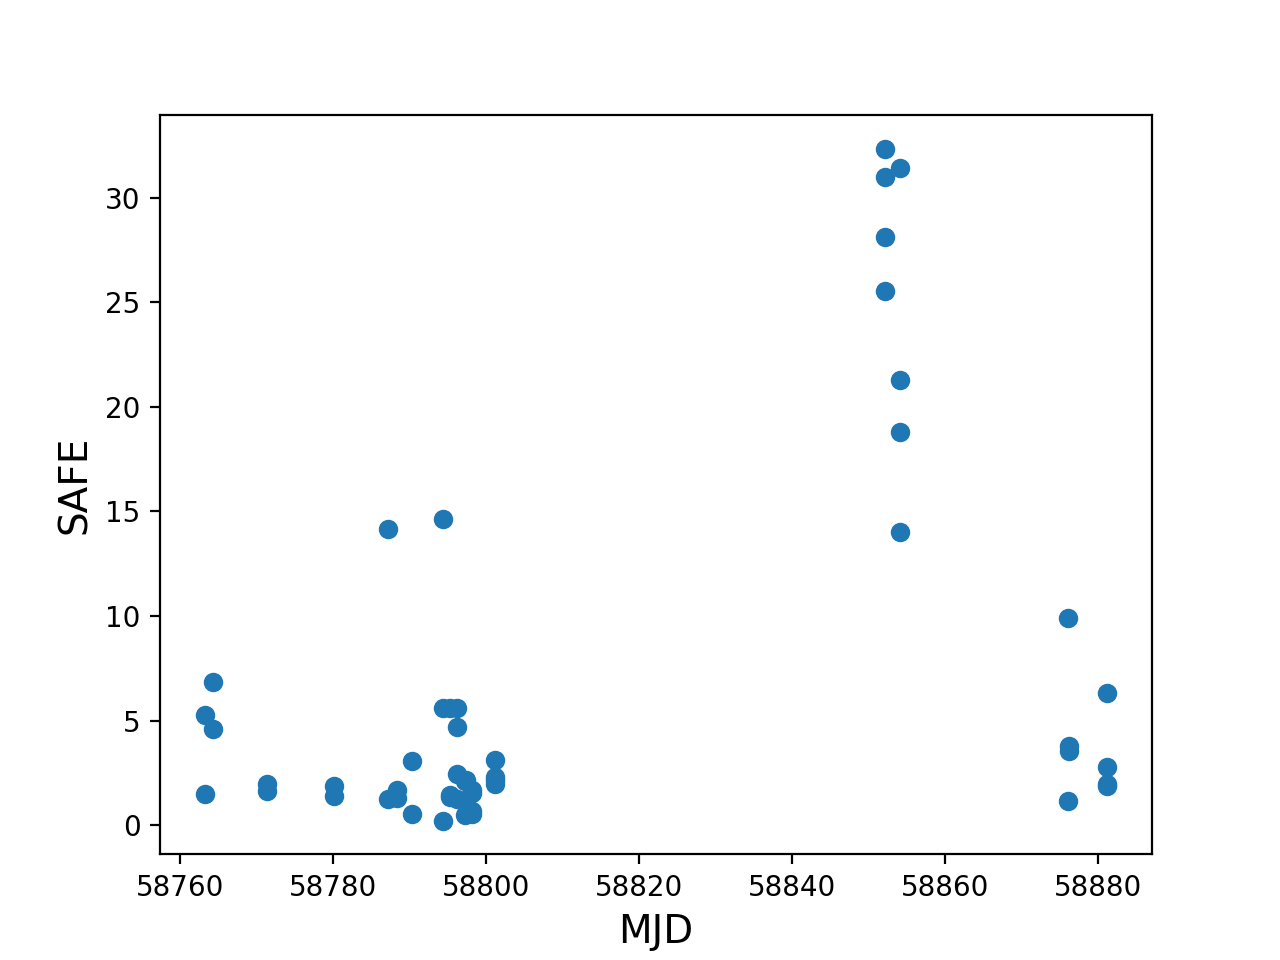

In [8]:
plt.scatter(hd3651.MJD.values, hd3651.SAFE.values)
plt.xlabel("MJD", fontsize=14)
plt.ylabel("SAFE", fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


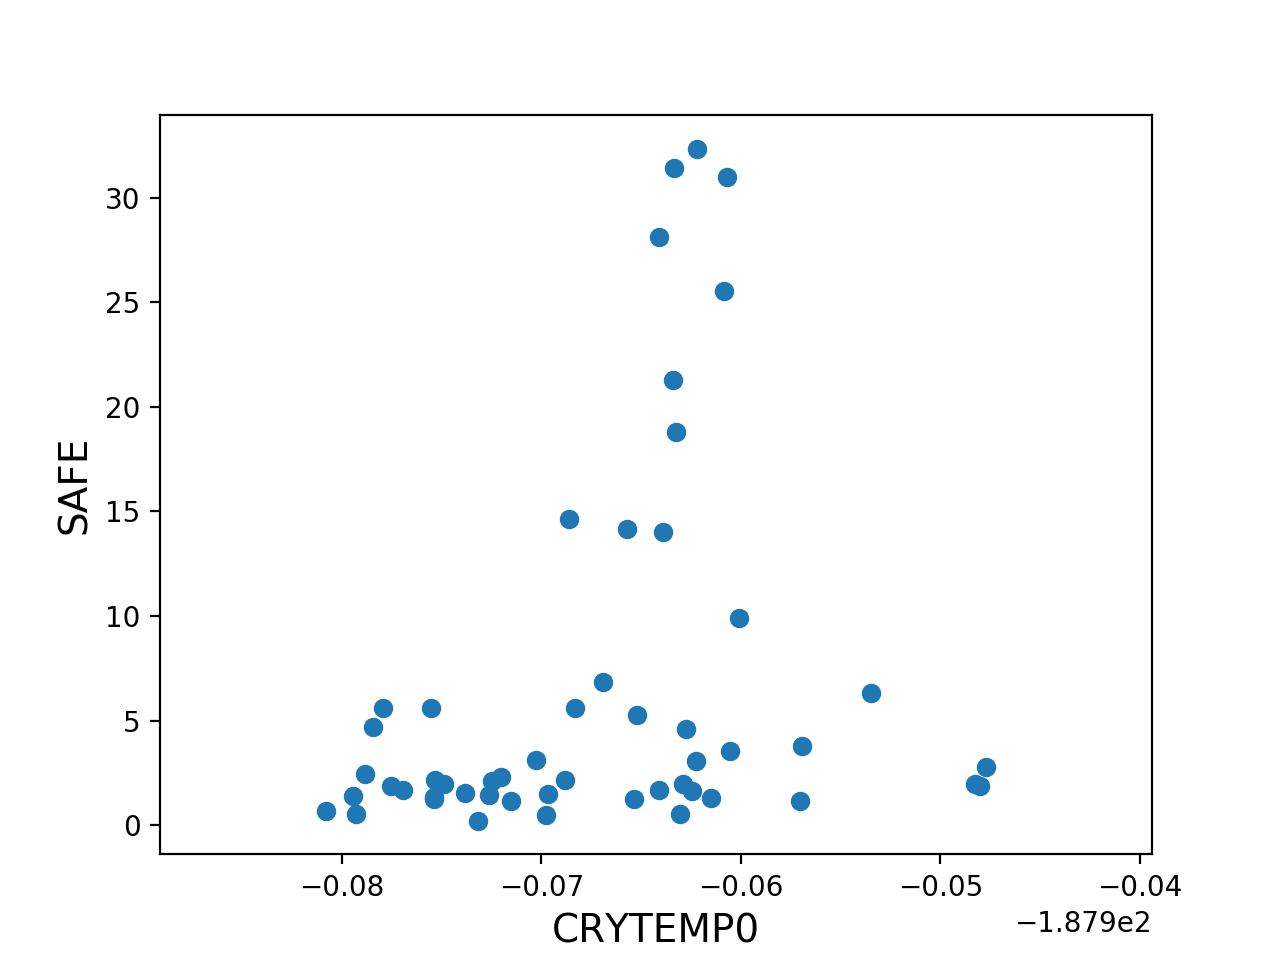

In [9]:
plt.scatter(hd3651.CRYTEMP0.values, hd3651.SAFE.values)
plt.xlabel("CRYTEMP0", fontsize=14)
plt.ylabel("SAFE", fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


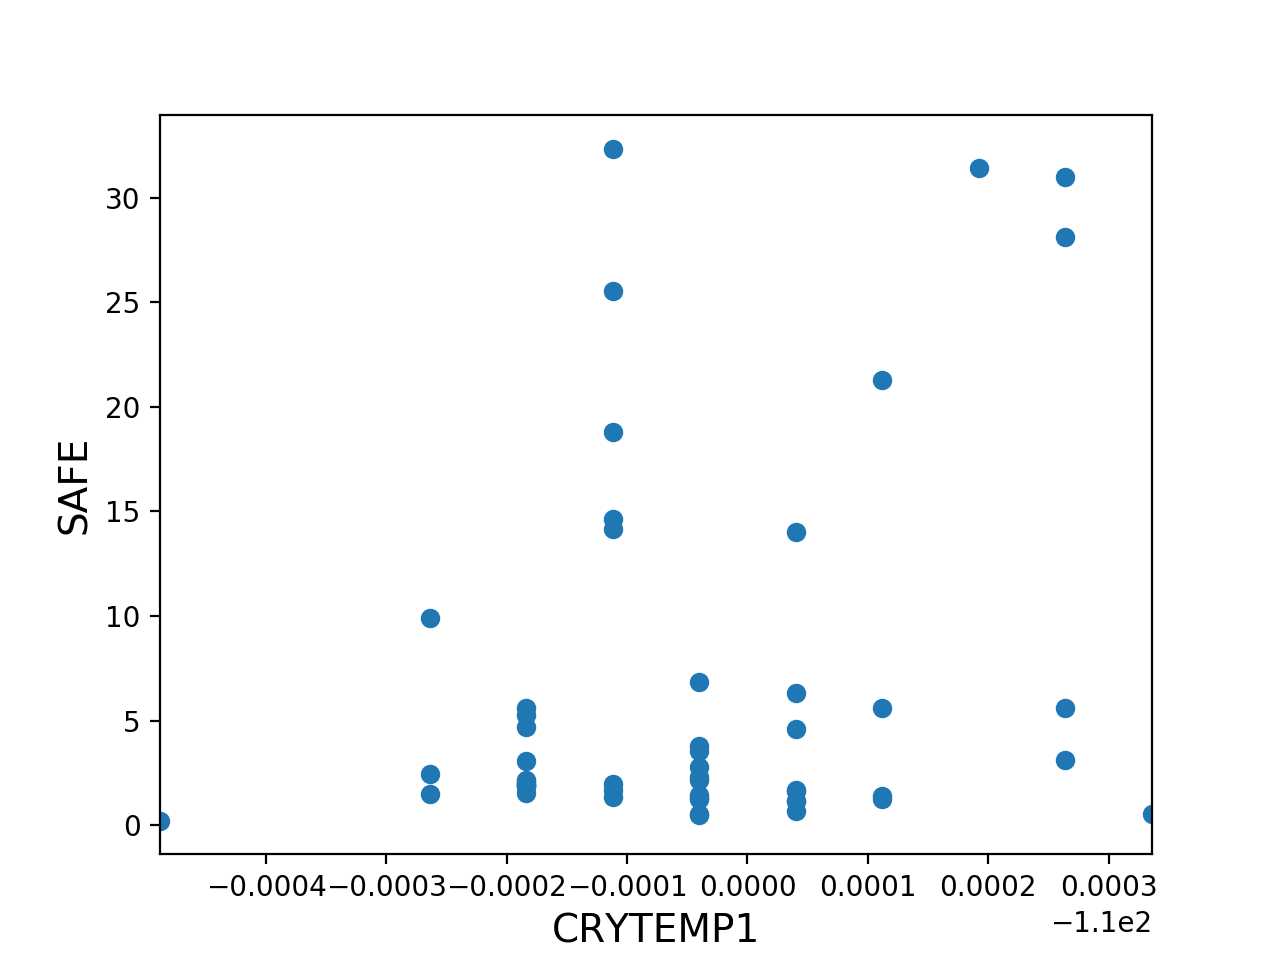

In [17]:
plt.scatter(hd3651.CRYTEMP1.values, hd3651.SAFE.values)
plt.xlim(np.min(hd3651.CRYTEMP1.values), np.max(hd3651.CRYTEMP1.values))
plt.xlabel("CRYTEMP1", fontsize=14)
plt.ylabel("SAFE", fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


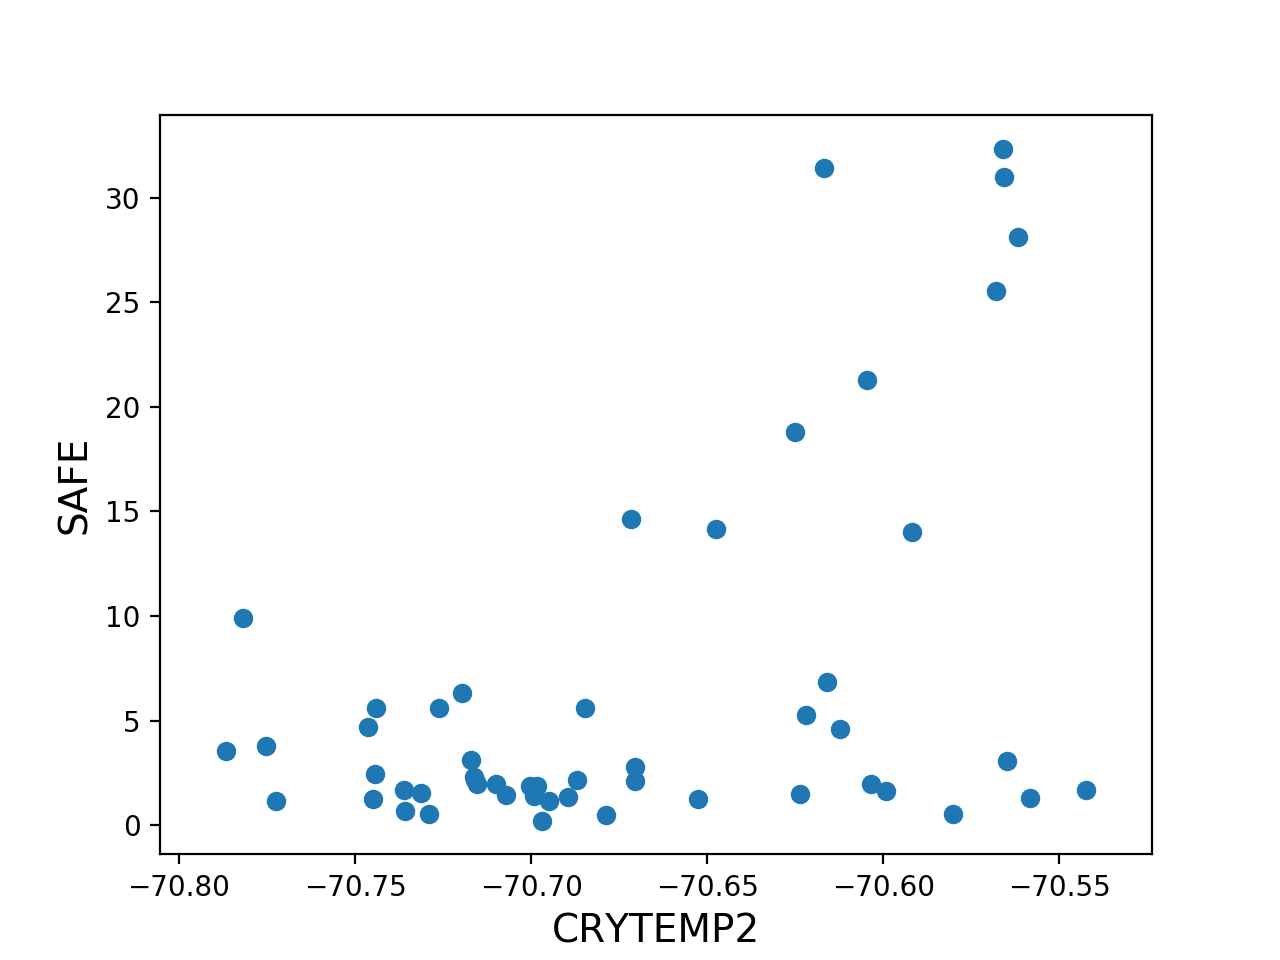

In [18]:
plt.scatter(hd3651.CRYTEMP2.values, hd3651.SAFE.values)
plt.xlabel("CRYTEMP2", fontsize=14)
plt.ylabel("SAFE", fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


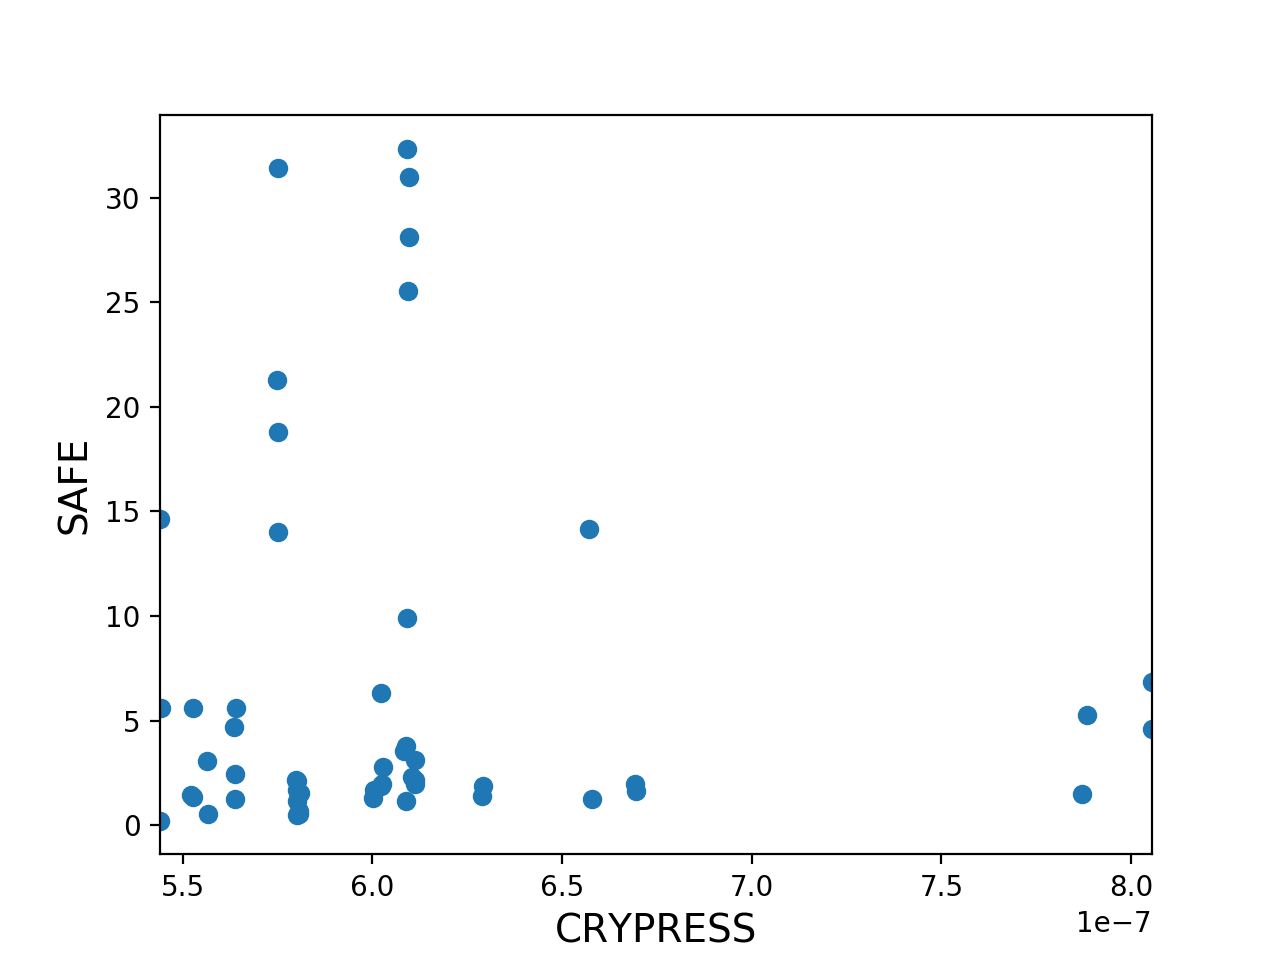

In [20]:
plt.scatter(hd3651.CRYPRESS.values, hd3651.SAFE.values)
plt.xlim(np.min(hd3651.CRYPRESS.values), np.max(hd3651.CRYPRESS.values))
plt.xlabel("CRYPRESS", fontsize=14)
plt.ylabel("SAFE", fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


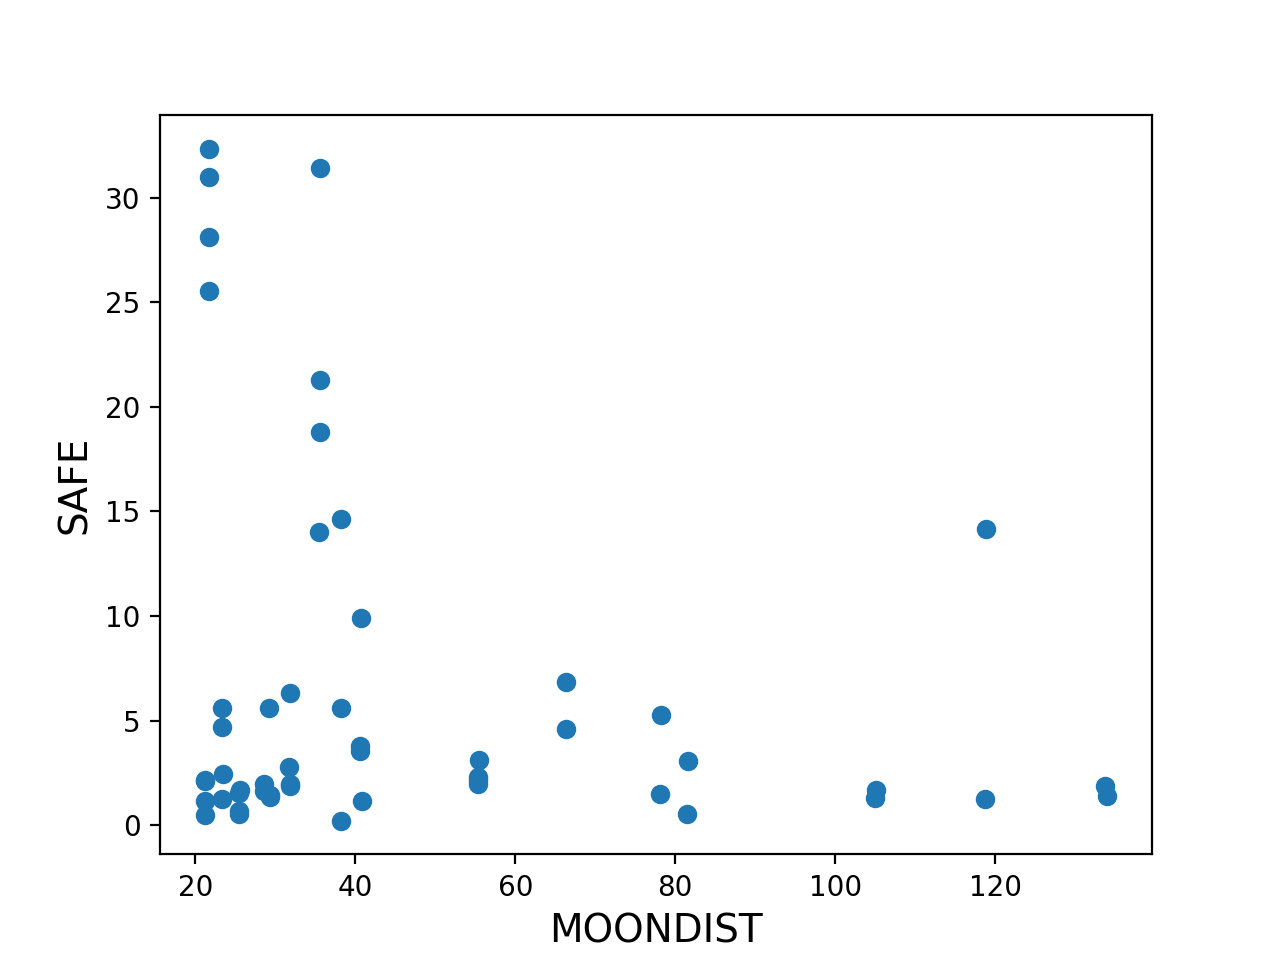

In [21]:
plt.scatter(hd3651.MOONDIST.values, hd3651.SAFE.values)
plt.xlabel("MOONDIST", fontsize=14)
plt.ylabel("SAFE", fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


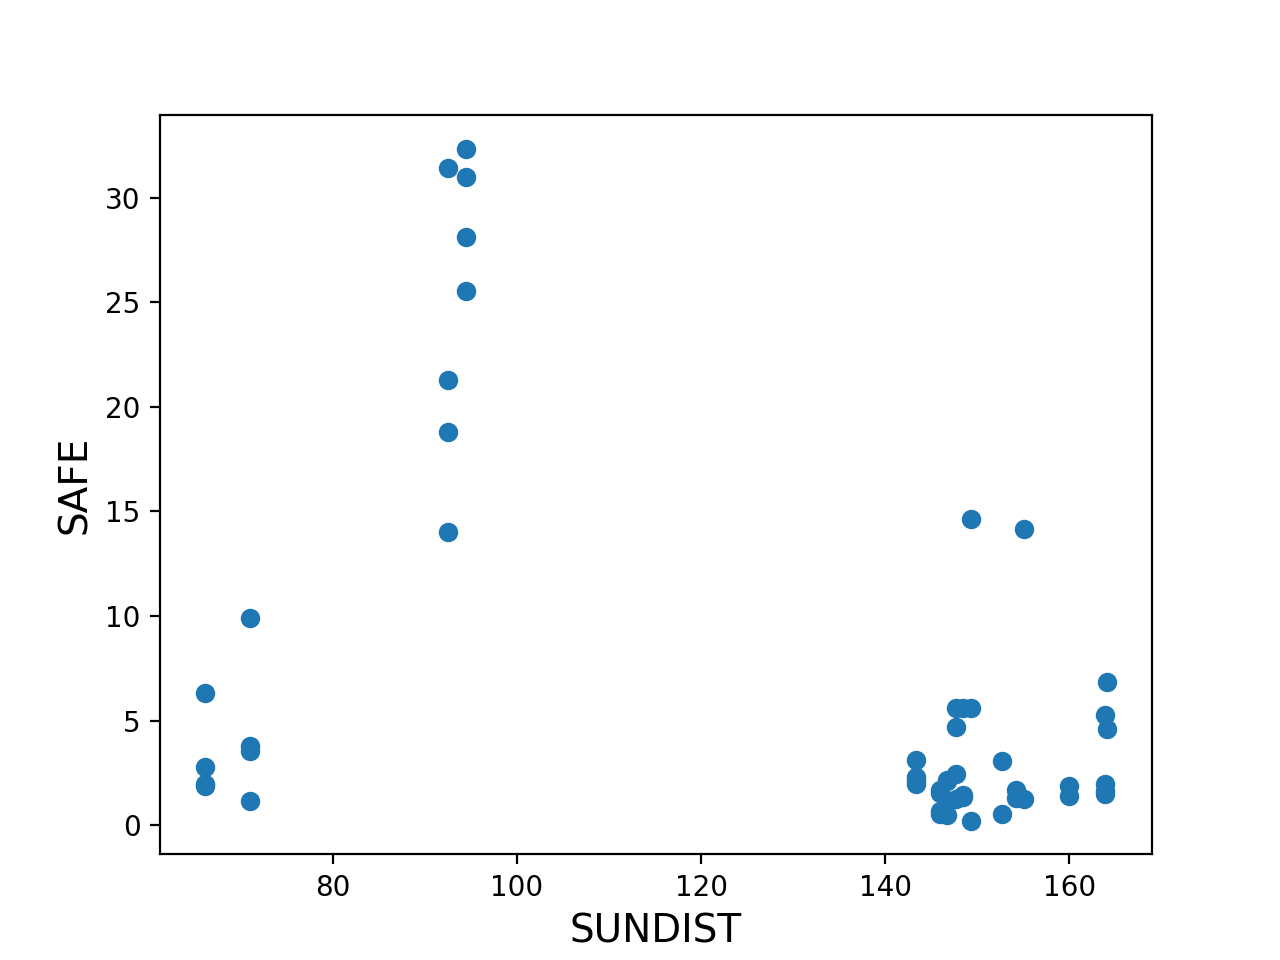

In [22]:
plt.scatter(hd3651.SUNDIST.values, hd3651.SAFE.values)
plt.xlabel("SUNDIST", fontsize=14)
plt.ylabel("SAFE", fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


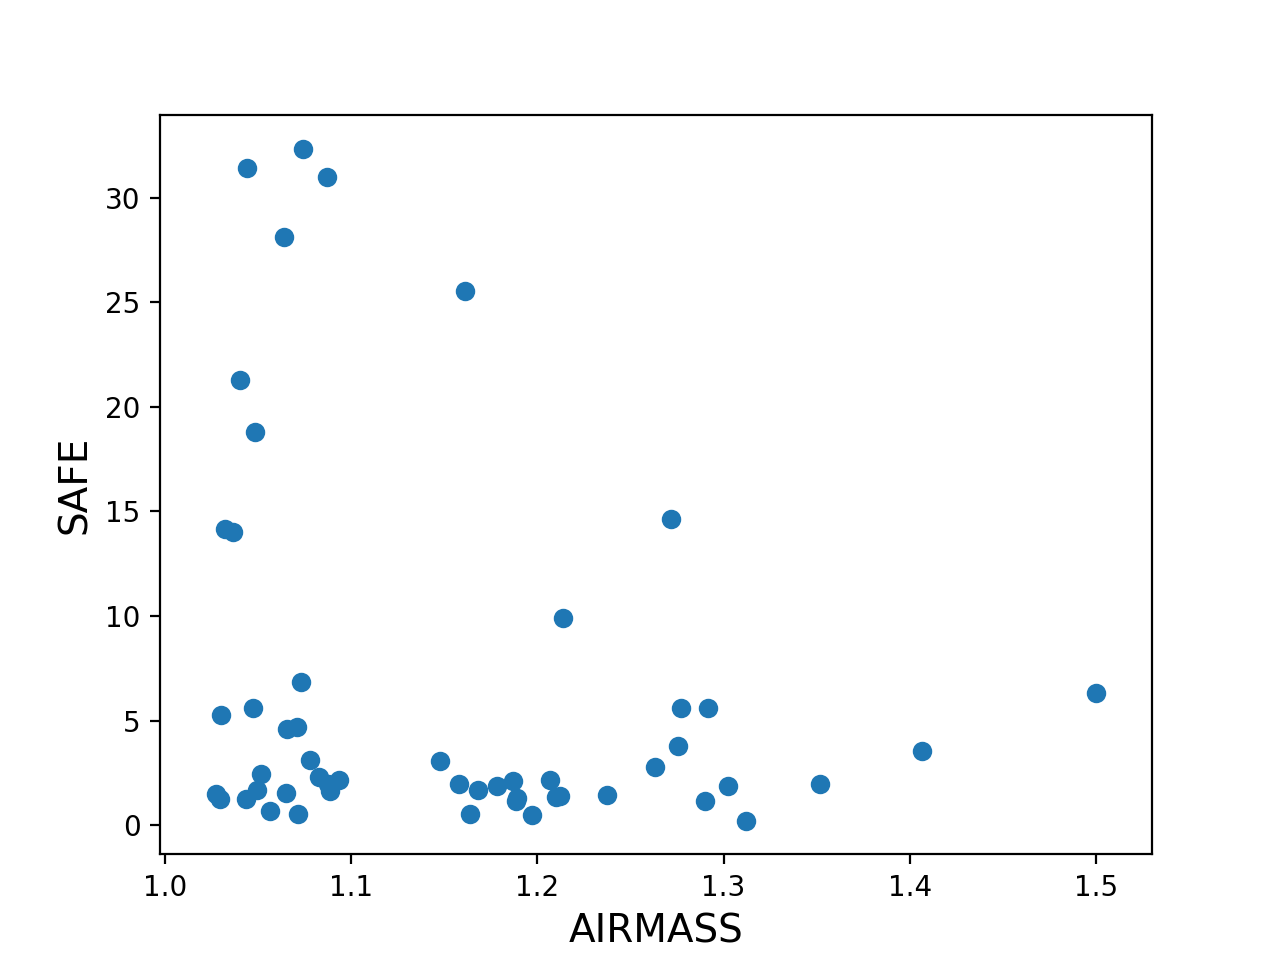

In [23]:
plt.scatter(hd3651.AIRMASS.values, hd3651.SAFE.values)
plt.xlabel("AIRMASS", fontsize=14)
plt.ylabel("SAFE", fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


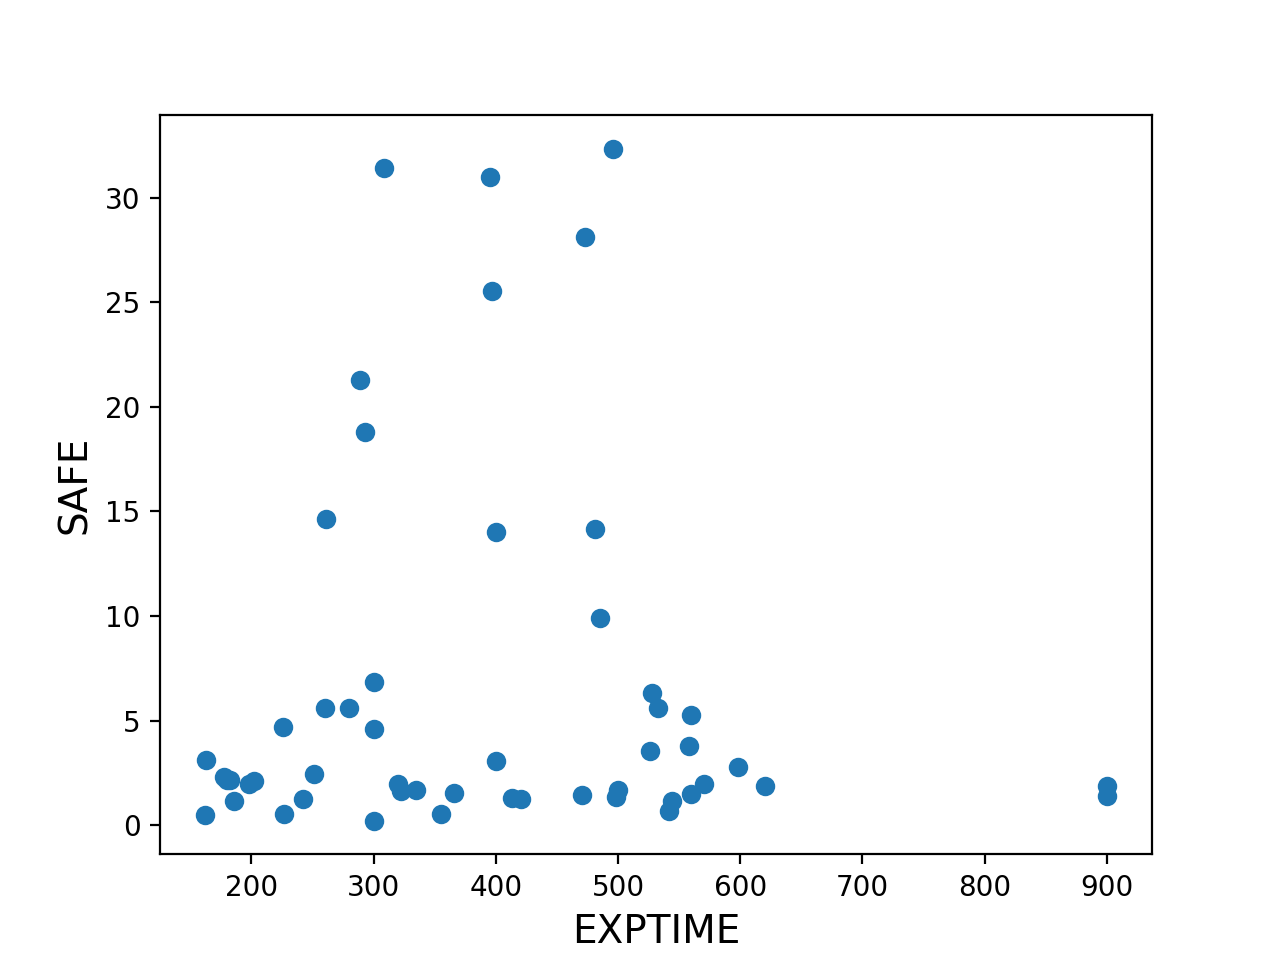

In [24]:
plt.scatter(hd3651.EXPTIME.values, hd3651.SAFE.values)
plt.xlabel("EXPTIME", fontsize=14)
plt.ylabel("SAFE", fontsize=14)
plt.show()

# Let's take a closer look at the spectra between MJD 58840 and 58860

In [25]:
thesespec = np.where((hd3651.MJD.values > 58840) & (hd3651.MJD.values < 58860))[0]
hd3651.Filename.values[thesespec]

array(['3651spec/3651_200104.1083ctd_2.csv',
       '3651spec/3651_200104.1084ctd_2.csv',
       '3651spec/3651_200104.1086ctd_2.csv',
       '3651spec/3651_200104.1087ctd_2.csv',
       '3651spec/3651_200106.1070ctd_2.csv',
       '3651spec/3651_200106.1071ctd_2.csv',
       '3651spec/3651_200106.1072ctd_2.csv',
       '3651spec/3651_200106.1073ctd_2.csv'], dtype=object)

In [26]:
spec = [pd.read_csv(f.split('/')[1]) for f in hd3651.Filename.values[thesespec]]

### Raw stitched spectra

<IPython.core.display.Javascript object>


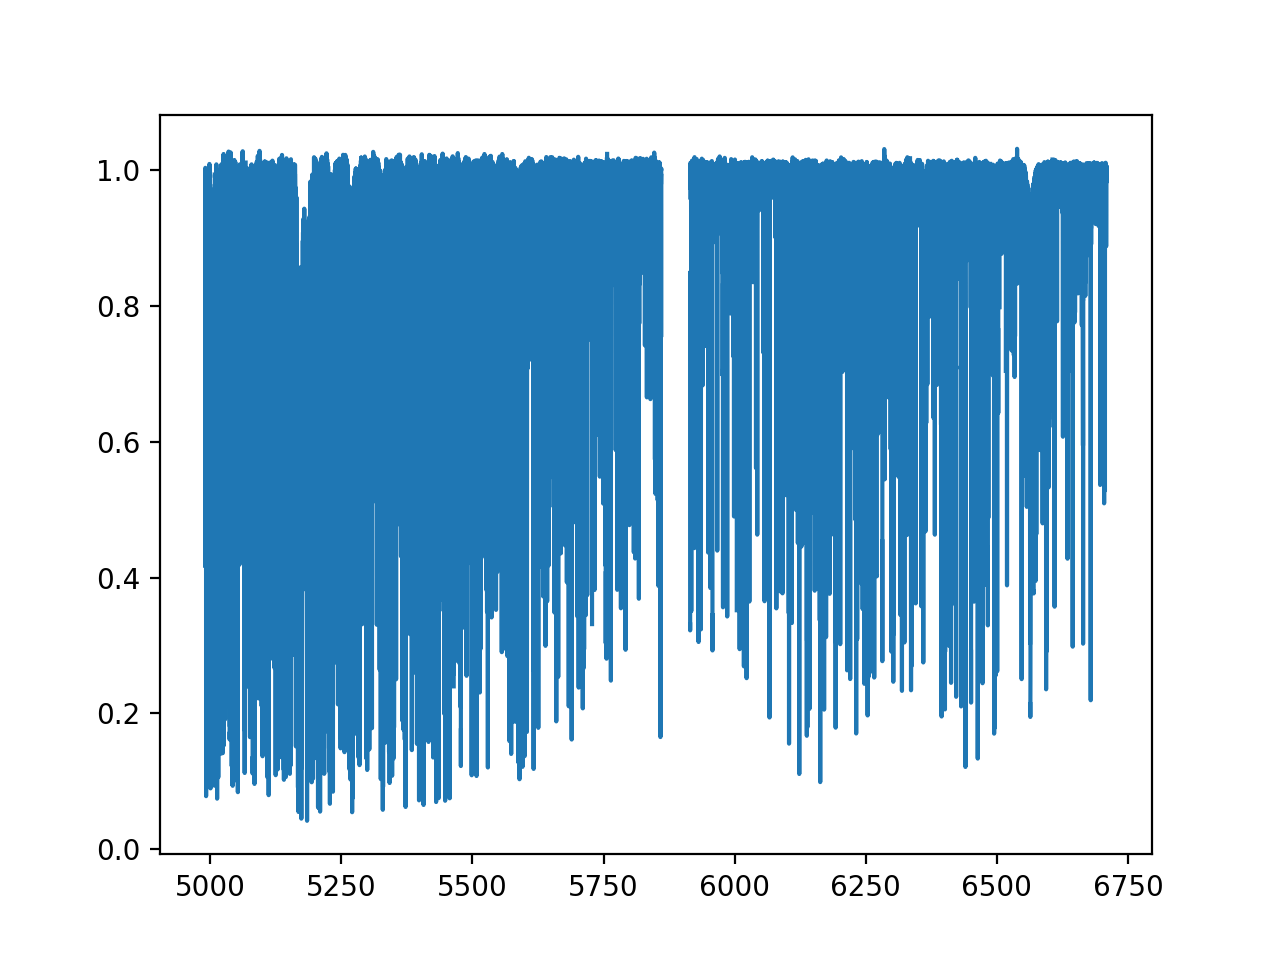

In [27]:
k=0
w = np.where((spec[k].Wavelength.values > 4990) & (spec[k].Wavelength.values < 6710))[0]
plt.plot(spec[k].Wavelength.values[w], spec[k].Flux.values[w])
plt.show()

### Renormalized spectra

<IPython.core.display.Javascript object>


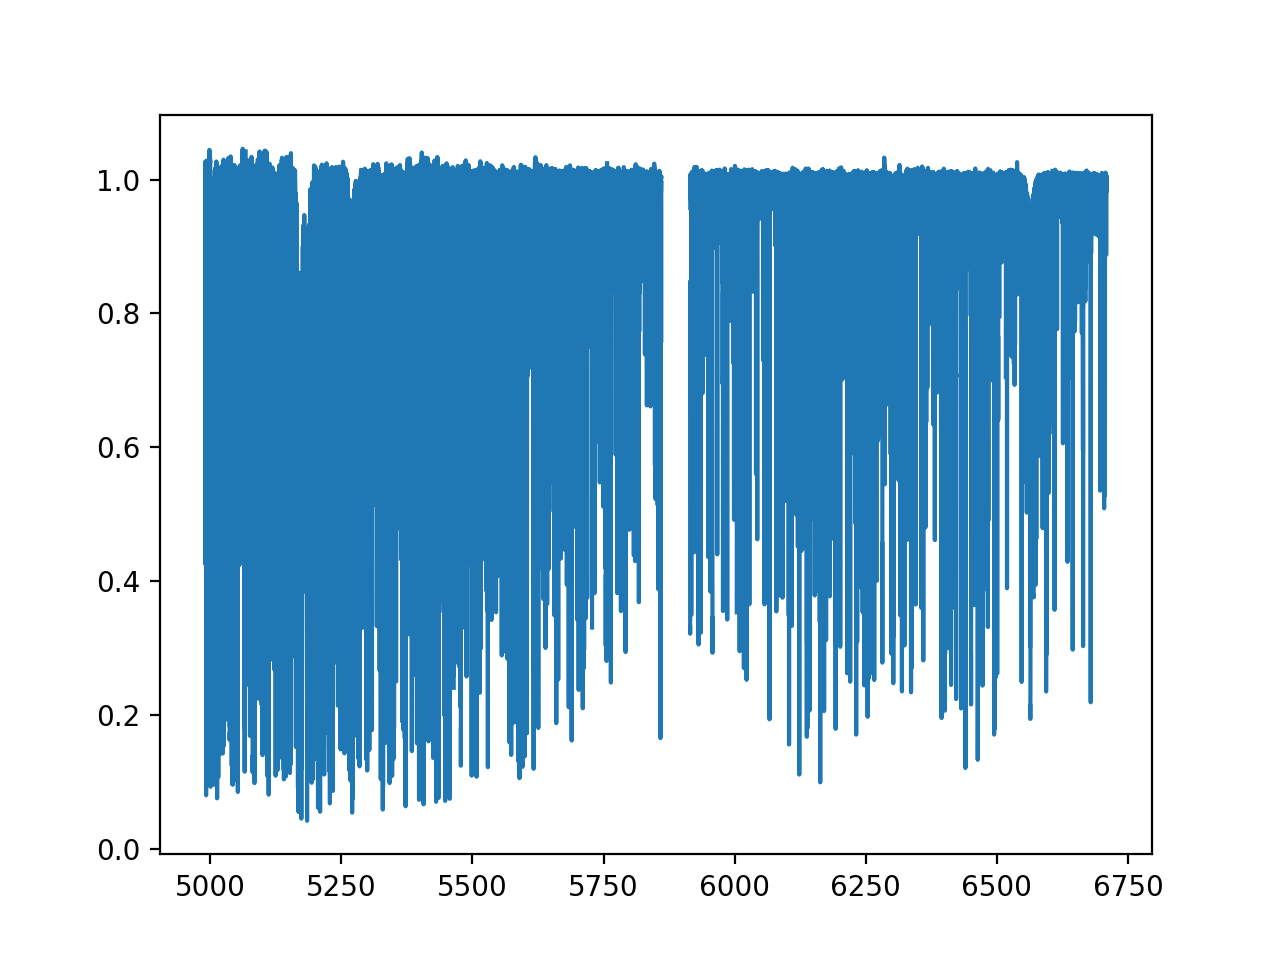

In [28]:
k=0
w = np.where((spec[k].Wavelength.values > 4990) & (spec[k].Wavelength.values < 6710))[0]
plt.plot(spec[k].Wavelength.values[w], spec[k].Flux.values[w]/spec[k].Continuum.values[w])
plt.show()

### Gaussian Fit Parameters

In [33]:
from scipy.optimize import curve_fit
def gaussfunc(x, mu, sigma):
    return np.exp(-((x - mu)**2)/(2*(sigma**2)))
def gauss1func(x, cntm, a1, mu1, sig1):
    return cntm - a1*gaussfunc(x, mu1, sig1)
def gauss2func(x, cntm, a1, a2, mu1, mu2, sig1, sig2):
    return cntm - a1*gaussfunc(x, mu1, sig1) - a2*gaussfunc(x, mu2, sig2)
def gauss3func(x, cntm, a1, a2, a3, mu1, mu2, mu3, sig1, sig2, sig3):
    return cntm - a1*gaussfunc(x, mu1, sig1) - a2*gaussfunc(x, mu2, sig2) - a3*gaussfunc(x, mu3, sig3)

In [31]:
template = pd.read_csv("3651smoothtemp2.csv")
template = template[~np.isnan(template.Flux.values)]
wt = np.where((template.Wavelength.values > 4989) & (template.Wavelength.values < 6711))[0]
wvl = template.Wavelength.values[wt]
flx = template.Flux.values[wt]

Features = pd.read_csv("../Data/SOAP_1pcnt/SOAP_Features.csv")
bestrv = 55290.2108
doppfact = 1+bestrv/299792458
Features = Features[(Features["Wv_lbounds"] > 5000) & (Features["Wv_ubounds"] < template.Wavelength.values[-1])]
Features["Wv_lbounds"] = doppfact*Features.Wv_lbounds.values
Features["Wv_ubounds"] = doppfact*Features.Wv_ubounds.values
Features["MinWvl"] = doppfact*Features.MinWvl.values

In [34]:
amps = []
mus = []
sigs = []
cntms = []
badftrs = []
for i in range(1,len(Features.Wv_lbounds.values)-1):
    if len(np.where((wvl >= Features.Wv_lbounds.values[i]) & (wvl <= Features.Wv_ubounds.values[i]))[0]) < 4:
        badftrs.append(i)
        continue
    #print(i)
    try:
        cntm_0 = 1.04
        w = np.where((wvl >= Features.Wv_lbounds.values[i-1]) & (wvl <= Features.Wv_ubounds.values[i-1]))[0]
        a1_0 = 1 - np.min(flx[w])
        mu1_0 = wvl[w][np.argmin(flx[w])]
        sig1_0 = (Features.Wv_ubounds.values[i-1] - Features.Wv_lbounds.values[i-1])/5
        w = np.where((wvl >= Features.Wv_lbounds.values[i]) & (wvl <= Features.Wv_ubounds.values[i]))[0]
        a2_0 = 1 - np.min(flx[w])
        mu2_0 = wvl[w][np.argmin(flx[w])]
        sig2_0 = (Features.Wv_ubounds.values[i] - Features.Wv_lbounds.values[i])/5
        w = np.where((wvl >= Features.Wv_lbounds.values[i+1]) & (wvl <= Features.Wv_ubounds.values[i+1]))[0]
        a3_0 = 1 - np.min(flx[w])
        mu3_0 = wvl[w][np.argmin(flx[w])]
        sig3_0 = (Features.Wv_ubounds.values[i+1] - Features.Wv_lbounds.values[i+1])/5
        w = np.where((wvl >= Features.Wv_lbounds.values[i-1]) & (wvl <= Features.Wv_ubounds.values[i+1]))[0]
        pars, cov = curve_fit(gauss3func, wvl[w], flx[w], p0 = [cntm_0, a1_0, a2_0, a3_0, mu1_0, mu2_0, mu3_0, sig1_0, sig2_0, sig3_0], bounds = ([0.9, 0,0,0,Features.Wv_lbounds.values[i-1],Features.Wv_lbounds.values[i], Features.Wv_lbounds.values[i+1], 0,0,0], [1.1,1,1,1,Features.Wv_ubounds.values[i-1],Features.Wv_ubounds.values[i], Features.Wv_ubounds.values[i+1], 5*sig1_0, 5*sig2_0, 5*sig3_0]))
        cntms.append(pars[0])
        amps.append(pars[2])
        mus.append(pars[5])
        sigs.append(pars[8])
    except:
        try:
            w = np.where((wvl >= Features.Wv_lbounds.values[i-1]) & (wvl <= Features.Wv_ubounds.values[i]))[0]
            pars, cov = curve_fit(gauss2func, wvl[w], flx[w], p0 = [cntm_0, a1_0, a2_0, mu1_0, mu2_0, sig1_0, sig2_0], bounds = ([0.9,0,0,Features.Wv_lbounds.values[i-1],Features.Wv_lbounds.values[i],0,0], [1.1,1,1,Features.Wv_ubounds.values[i-1],Features.Wv_ubounds.values[i], 5*sig1_0, 5*sig2_0]))
            cntms.append(pars[0])
            amps.append(pars[2])
            mus.append(pars[4])
            sigs.append(pars[6])
        except:
            try:
                w = np.where((wvl >= Features.Wv_lbounds.values[i]) & (wvl <= Features.Wv_ubounds.values[i+1]))[0]
                pars, cov = curve_fit(gauss2func, wvl[w], flx[w], p0 = [cntm_0, a2_0, a3_0, mu2_0, mu3_0, sig2_0, sig3_0], bounds = ([0.9,0,0,Features.Wv_lbounds.values[i],Features.Wv_lbounds.values[i+1],0,0], [1.1,1,1,Features.Wv_ubounds.values[i],Features.Wv_ubounds.values[i+1], 5*sig2_0, 5*sig3_0]))
                cntms.append(pars[0])
                amps.append(pars[1])
                mus.append(pars[3])
                sigs.append(pars[5])
            except:
                try:
                    w = np.where((wvl >= Features.Wv_lbounds.values[i]) & (wvl <= Features.Wv_ubounds.values[i]))[0]
                    pars, cov = curve_fit(gauss1func, wvl[w], flx[w], p0 = [cntm_0, a2_0, mu2_0, sig2_0], bounds = ([0.9,0,Features.Wv_lbounds.values[i],0],[1.1,1,Features.Wv_ubounds.values[i], 5*sig2_0]))
                    cntms.append(pars[0])
                    amps.append(pars[1])
                    mus.append(pars[2])
                    sigs.append(pars[3])
                except:
                    cntms.append(1)
                    amps.append(0)
                    mus.append(mu2_0)
                    sigs.append(sig2_0)

#Fit the first and the last features
w = np.where((wvl >= Features.Wv_lbounds.values[0]) & (wvl <= Features.Wv_ubounds.values[0]))[0]
a2_0 = 1 - np.min(flx[w])
mu2_0 = wvl[w][np.argmin(flx[w])]
sig2_0 = (Features.Wv_ubounds.values[0] - Features.Wv_lbounds.values[0])/5
w = np.where((wvl >= Features.Wv_lbounds.values[1]) & (wvl <= Features.Wv_ubounds.values[1]))[0]
a3_0 = 1 - np.min(flx[w])
mu3_0 = wvl[w][np.argmin(flx[w])]
sig3_0 = (Features.Wv_ubounds.values[1] - Features.Wv_lbounds.values[1])/5
w = np.where((wvl >= Features.Wv_lbounds.values[0]) & (wvl <= Features.Wv_ubounds.values[1]))[0]
pars, cov = curve_fit(gauss2func, wvl[w], flx[w], p0 = [1.04, a2_0, a3_0, mu2_0, mu3_0, sig2_0, sig3_0], bounds = ([0.9,0,0,Features.Wv_lbounds.values[0],Features.Wv_lbounds.values[1],0,0],[1.1,1,1,Features.Wv_ubounds.values[0],Features.Wv_ubounds.values[1], 5*sig2_0, 5*sig3_0]))


w = np.where((wvl >= Features.Wv_lbounds.values[-2]) & (wvl <= Features.Wv_ubounds.values[-2]))[0]
a2_0 = 1 - np.min(flx[w])
mu2_0 = wvl[w][np.argmin(flx[w])]
sig2_0 = (Features.Wv_ubounds.values[-2] - Features.Wv_lbounds.values[-2])/5
w = np.where((wvl >= Features.Wv_lbounds.values[-1]) & (wvl <= Features.Wv_ubounds.values[-1]))[0]
a3_0 = 1 - np.min(flx[w])
mu3_0 = wvl[w][np.argmin(flx[w])]
sig3_0 = (Features.Wv_ubounds.values[-1] - Features.Wv_lbounds.values[-1])/5
w = np.where((wvl >= Features.Wv_lbounds.values[-2]) & (wvl <= Features.Wv_ubounds.values[-1]))[0]
pars2, cov2 = curve_fit(gauss2func, wvl[w], flx[w], p0 = [1.04, a2_0, a3_0, mu2_0, mu3_0, sig2_0, sig3_0], bounds = ([0.9,0,0,Features.Wv_lbounds.values[-2],Features.Wv_lbounds.values[-1],0,0], [1.1,1,1,Features.Wv_ubounds.values[-2],Features.Wv_ubounds.values[-1], 5*sig2_0, 5*sig3_0]))
cntms = [pars[0]] + cntms + [pars2[0]]
amps = [pars[1]] + amps + [pars2[2]]
mus = [pars[3]] + mus + [pars2[4]]
sigs = [pars[5]] + sigs + [pars2[6]]

In [36]:
Features = Features.iloc[np.setdiff1d(np.arange(len(Features.Wv_lbounds.values)), np.array(badftrs)),:]
assert len(Features.Wv_lbounds.values) == len(cntms)

Features["Gauss_amp"] = np.array(amps)
Features["Gauss_mu"] = np.array(mus)
Features["Gauss_sig_true"] = np.array(list(Features.Gauss_sig.values))
Features["Gauss_sig"] = np.array(sigs)
Features["Continuum"] = np.array(cntms)

sig_cutoff = 2.5*np.percentile(Features.Gauss_sig.values, 75) - 1.5*np.percentile(Features.Gauss_sig.values, 25)
Features = Features[(Features.Gauss_sig.values <= sig_cutoff) & (Features.Gauss_amp.values > 0) & (Features.Gauss_sig.values >= 0.001) & (Features.Continuum.values > 0.98) & (Features.Continuum.values < 1.02) & (Features.Wv_ubounds.values - Features.Wv_lbounds.values > 6*Features.Gauss_sig.values)]

<IPython.core.display.Javascript object>


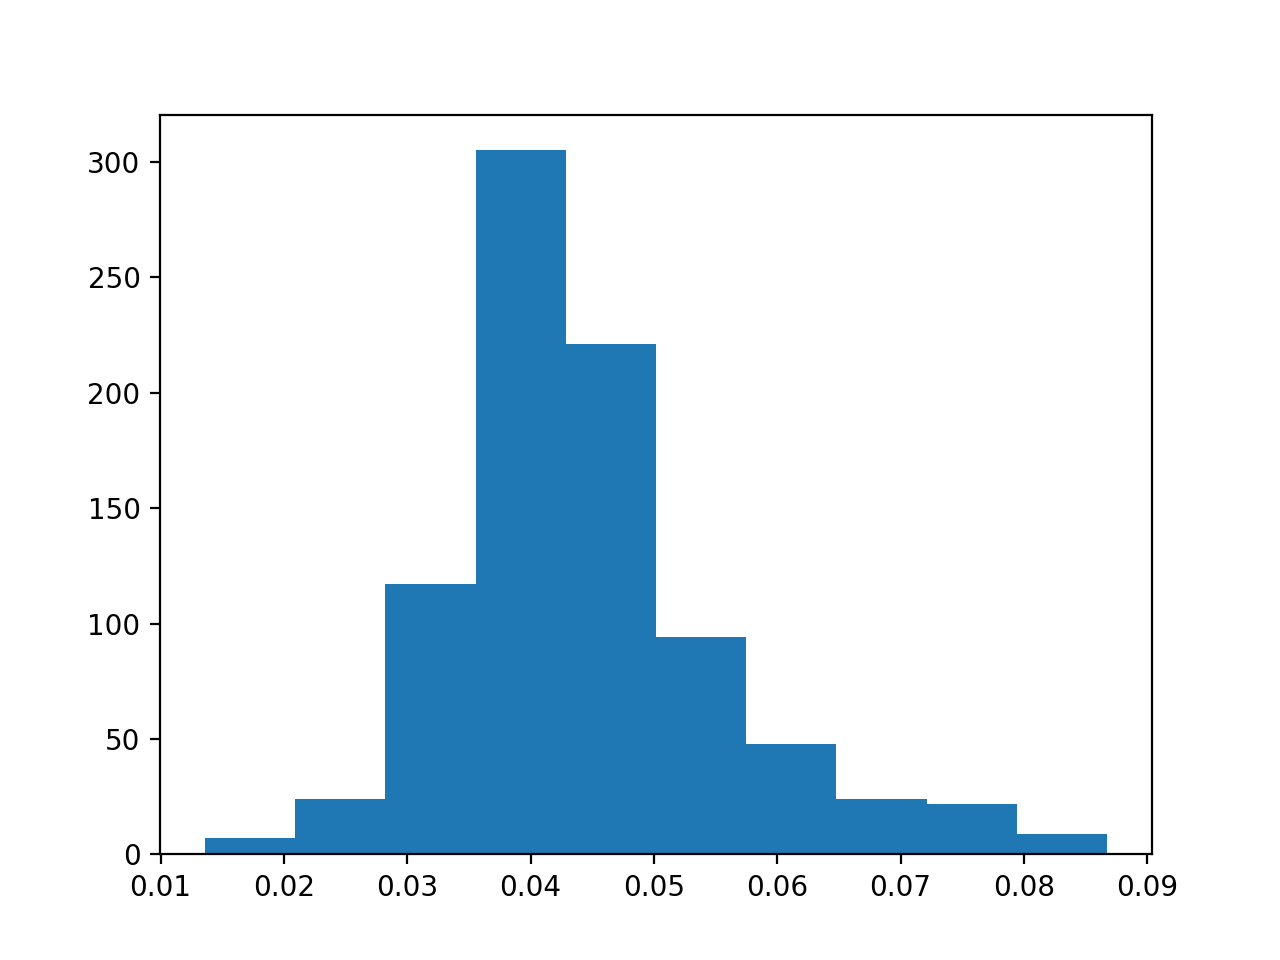

In [37]:
plt.hist(Features.Gauss_sig.values)
plt.show()

<IPython.core.display.Javascript object>


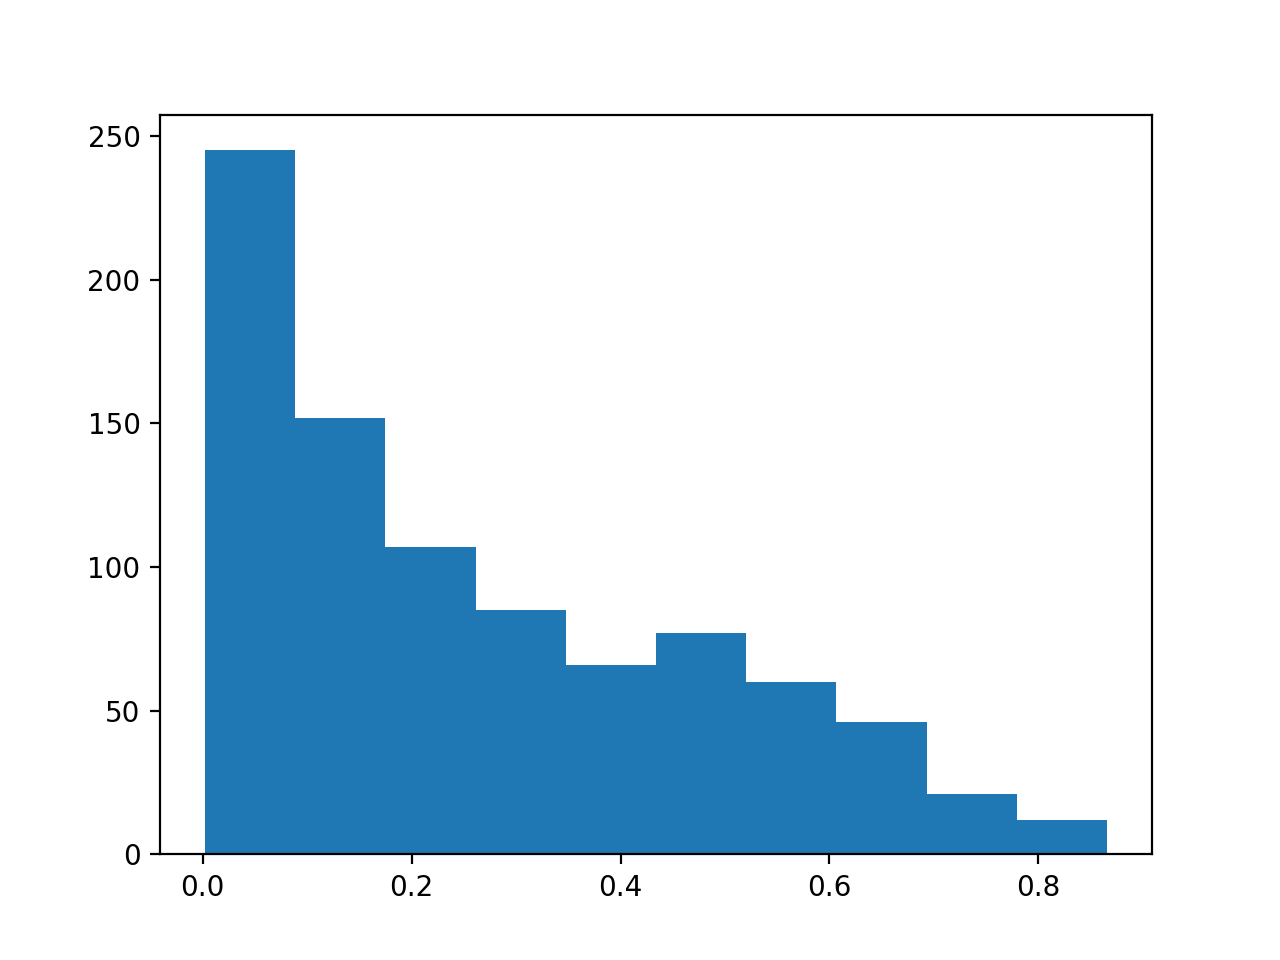

In [38]:
plt.hist(Features.Gauss_amp.values)
plt.show()

### Difference Spectrum

In [41]:
from wave_match import wave_match2

In [39]:
pixspc = template.Wavelength.values[1:] - template.Wavelength.values[:-1]
rightcutoffs = template.Wavelength.values[np.where(pixspc > np.percentile(pixspc, 75) + 15*(np.percentile(pixspc, 75) - np.percentile(pixspc, 25)))[0]]
rightcutoffs = np.hstack((rightcutoffs, template.Wavelength.values[-1]))
leftcutoffs = template.Wavelength.values[np.where(pixspc > np.percentile(pixspc, 75) + 15*(np.percentile(pixspc, 75) - np.percentile(pixspc, 25)))[0] + 1]
leftcutoffs = np.hstack((template.Wavelength.values[0], leftcutoffs))

for i in range(len(spec)):
    spec[i]["Flux"] = spec[i]["Flux"]/spec[i]["Continuum"]
    spec[i]["Uncertainty"] = spec[i]["Uncertainty"]/spec[i]["Continuum"]

In [110]:
k = 2
wvl = []
tempflx = []
obsflx = []
obsunc = []
for i in range(len(leftcutoffs)):
    keep = np.where((spec[k].Wavelength.values > leftcutoffs[i]) &
                        (spec[k].Wavelength.values < rightcutoffs[i]))[0]
    tkeep = np.where((template.Wavelength.values >= leftcutoffs[i]) &
                        (template.Wavelength.values <= rightcutoffs[i]))[0]
    if len(tkeep) > 5 and len(keep) > 5:
        wvl = wvl + list(spec[k].Wavelength.values[keep])
        obsflx = obsflx + list(spec[k].Flux.values[keep])
        obsunc = obsunc + list(spec[k].Uncertainty.values[keep])
        tempflx = tempflx + list(wave_match2(template.Wavelength.values[tkeep], template.Flux.values[tkeep], 
                                             spec[k].Wavelength.values[keep]))

    #obsunc = obsunc + list(np.sqrt(tempflx))

nonans = np.where(~np.isnan(obsflx))[0]
wvl = np.array(wvl)[nonans]
obsflx = np.array(obsflx)[nonans]
obsunc = np.array(obsunc)[nonans]
tempflx = np.array(tempflx)[nonans]
keep = np.where((wvl >= 5000) & (wvl <= 6700))[0]
wvl = wvl[keep]
obsflx = obsflx[keep]
obsunc = obsunc[keep]
tempflx = tempflx[keep]

In [111]:
from abfeature_functions import doppshift, lowerSNR
from statsmodels.api import OLS, WLS
from scipy.special import eval_hermite
def hermgauss(x, n, mu=0, sig=1):
    x = np.array(x)
    c = 1/np.sqrt(sig*(2**n)*np.math.factorial(n)*np.sqrt(np.pi))
    return c*eval_hermite(n, (x-mu)/sig)*np.exp(-((x - mu)**2)/(2*sig**2))

In [112]:
keep = []
doppvar = np.array([])
for i in range(len(Features.Gauss_mu.values)):
    w = np.where((wvl <= Features.Wv_ubounds.values[i]) & (wvl >= Features.Wv_lbounds.values[i]))[0]
    if len(w) > 3:
        keep = keep + list(w)
        diff = tempflx[w] - doppshift(wvl[w], tempflx[w], 7)
        mdl = OLS(diff, np.array([hermgauss(wvl[w], j, mu=Features.Gauss_mu.values[i], sig=Features.Gauss_sig.values[i]) for j in [0,1,2,3,4,5]]).T).fit()
        doppvar = np.hstack((doppvar, mdl.fittedvalues/7))
            
Loadings = np.array(Features[["SOAPamp_0", "SOAPamp_2", "SOAPamp_3", "SOAPamp_4", "SOAPamp_5"]]).T
X = np.array(list(doppvar))
for j in [0,2,3,4,5]:
    v = np.array([])
    for i in range(len(Features.Wv_lbounds.values)):
        w = np.where((wvl <= Features.Wv_ubounds.values[i]) & (wvl >= Features.Wv_lbounds.values[i]))[0]
        if len(w) > 3:
            if j ==0:
                v = np.hstack((v,Loadings[j,i]*hermgauss(wvl[w], j, mu=Features.Gauss_mu.values[i], sig=Features.Gauss_sig.values[i])))
            else:
                v = np.hstack((v,Loadings[j-1,i]*hermgauss(wvl[w], j, mu=Features.Gauss_mu.values[i], sig=Features.Gauss_sig.values[i])))
    X = np.vstack((X, v))
        
diff1 = tempflx[keep] - obsflx[keep]
mdl1 = WLS(diff1, X.T, weights = 1/obsunc[keep]**2)
influence = OLS(mdl1.endog, mdl1.exog).fit().get_influence().influence
goodinf = np.where(np.abs(influence) <= np.median(influence) + np.percentile(influence, 75) + 50*(np.percentile(influence, 75) - np.percentile(influence, 25)))[0]

<IPython.core.display.Javascript object>


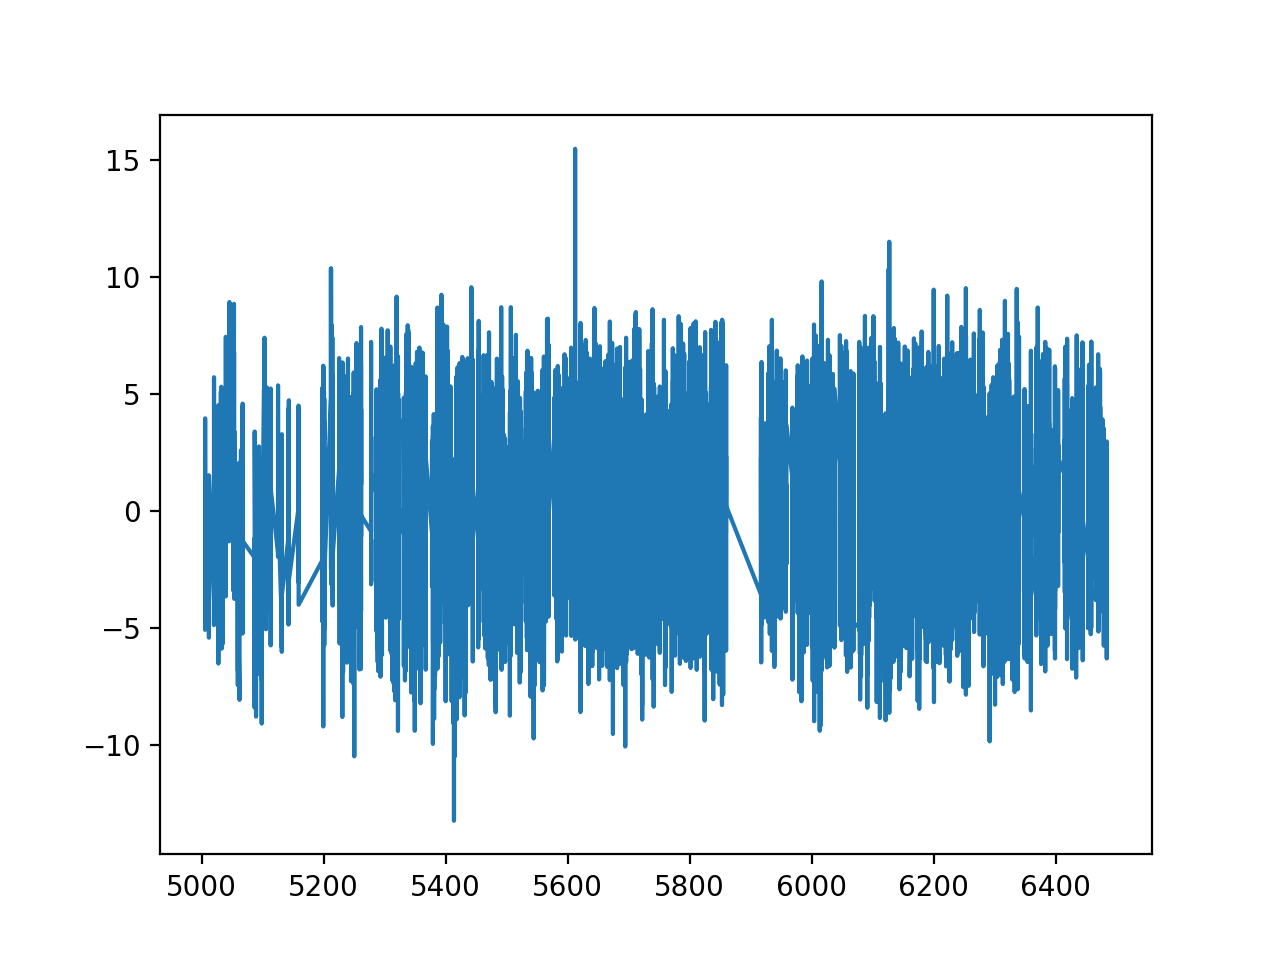

In [114]:
plt.plot(wvl[keep][goodinf], diff1[goodinf]/obsunc[keep][goodinf])
plt.show()

<IPython.core.display.Javascript object>


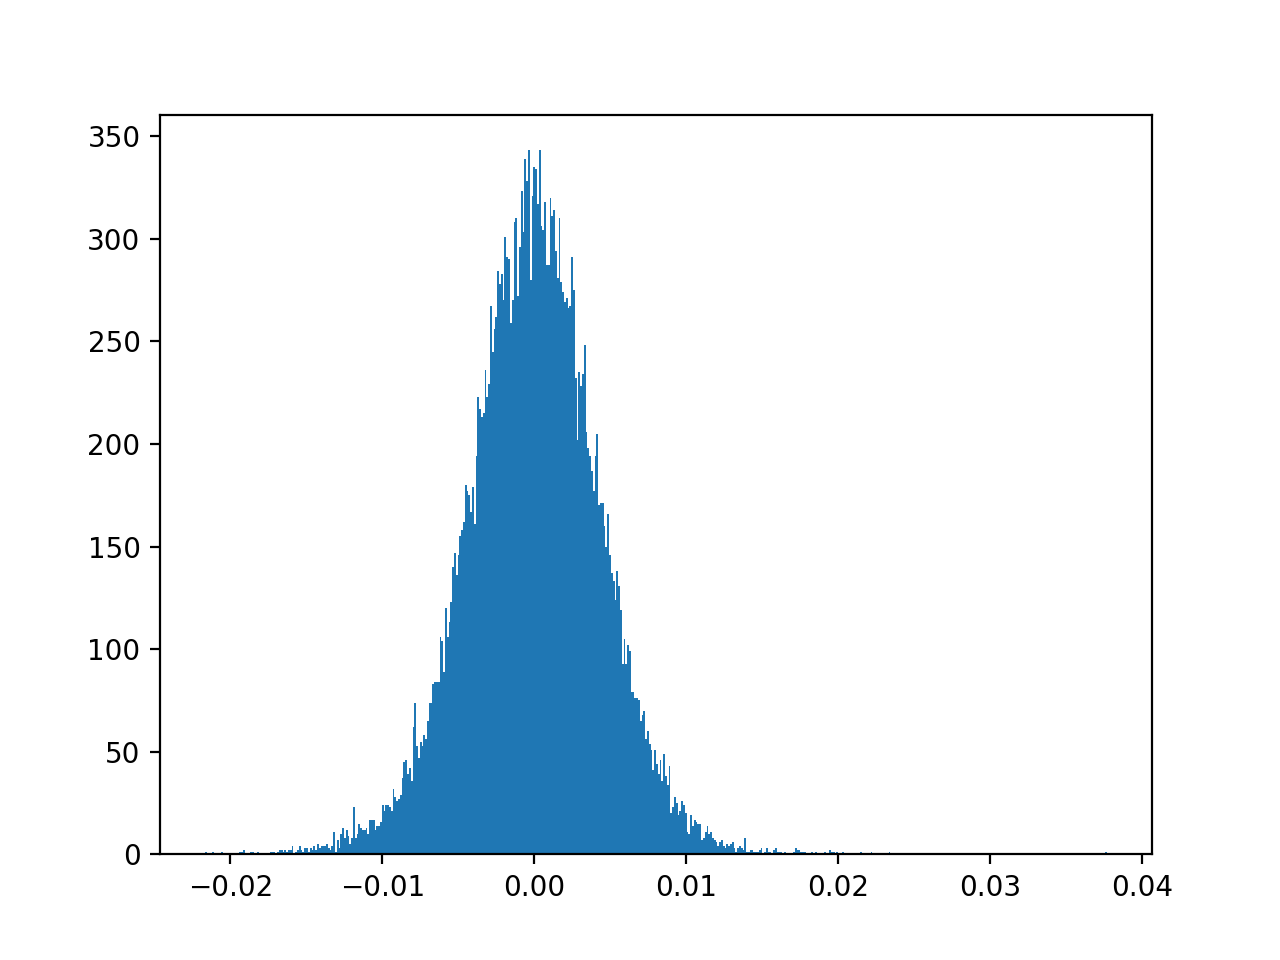

In [115]:
plt.hist(diff1[goodinf], bins=500)
plt.show()

### Leverage and Influence

<IPython.core.display.Javascript object>


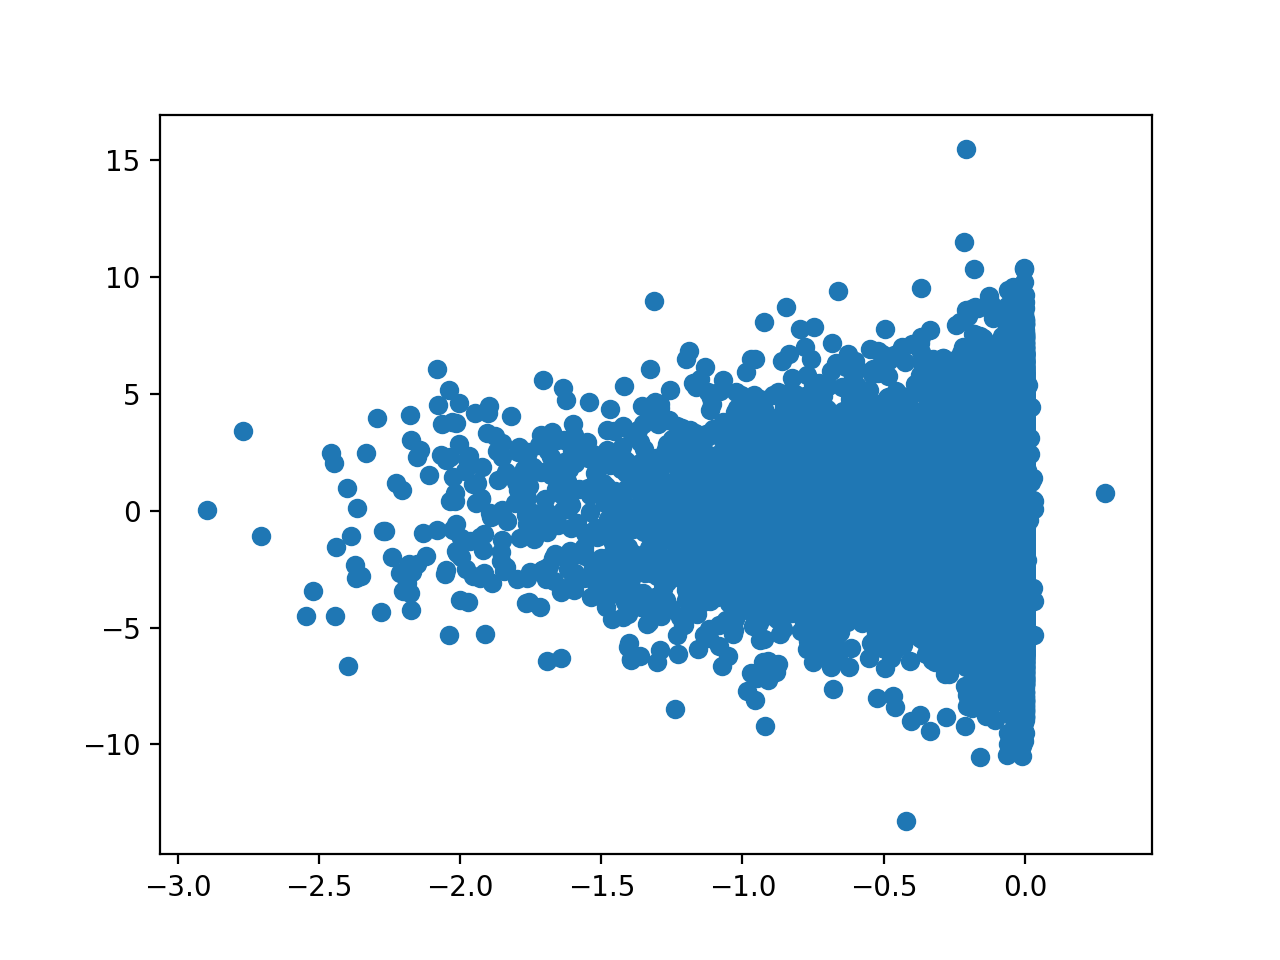

In [116]:
wx = X.T[goodinf,1]/obsunc[keep][goodinf]
wy = diff1[goodinf]/obsunc[keep][goodinf]
plt.scatter(wx, wy)
plt.show()

<IPython.core.display.Javascript object>


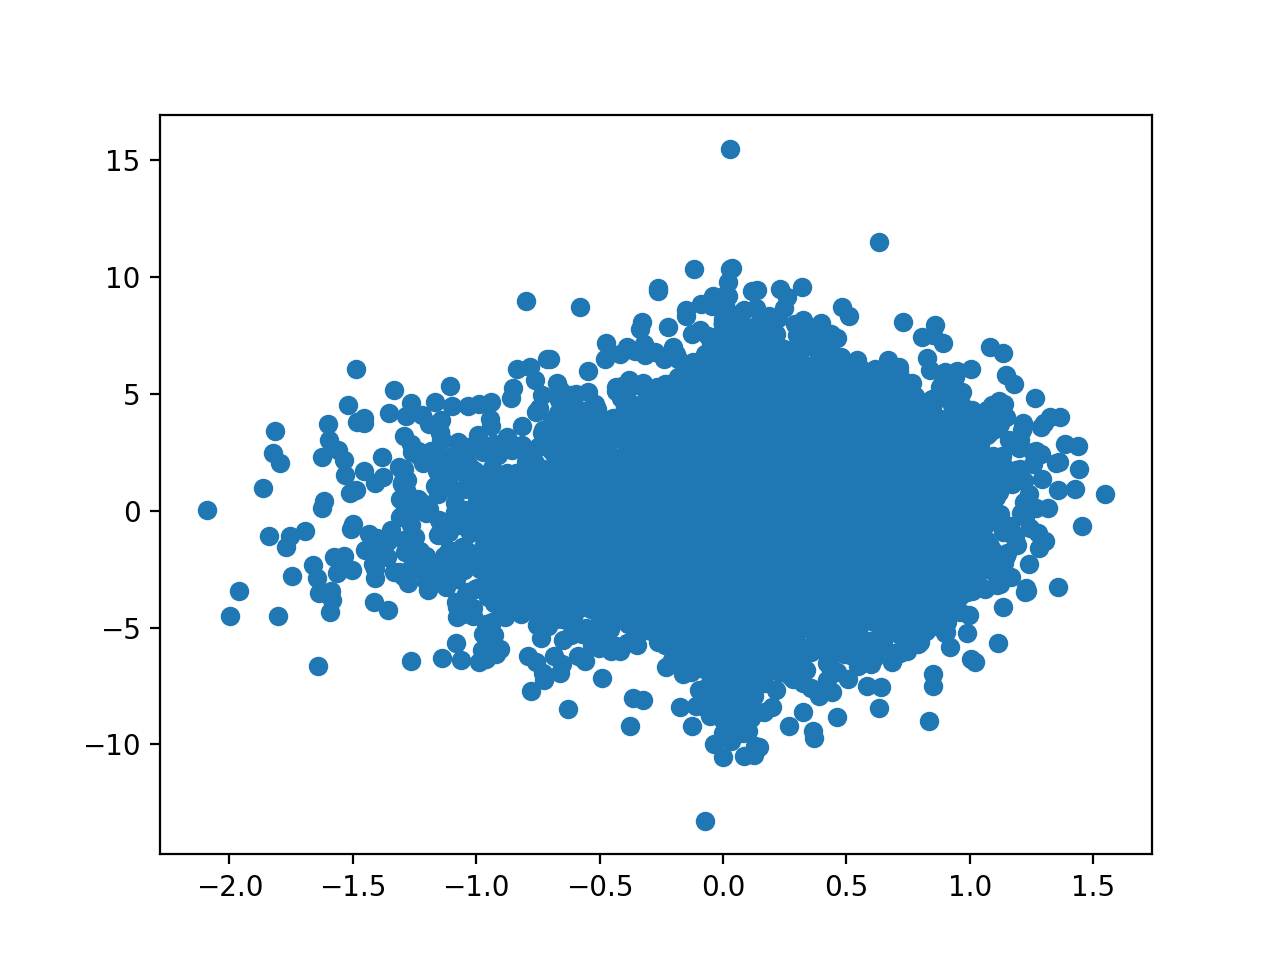

In [117]:
wx = X.T[goodinf,2]/obsunc[keep][goodinf]
wy = diff1[goodinf]/obsunc[keep][goodinf]
plt.scatter(wx, wy)
plt.show()

<IPython.core.display.Javascript object>


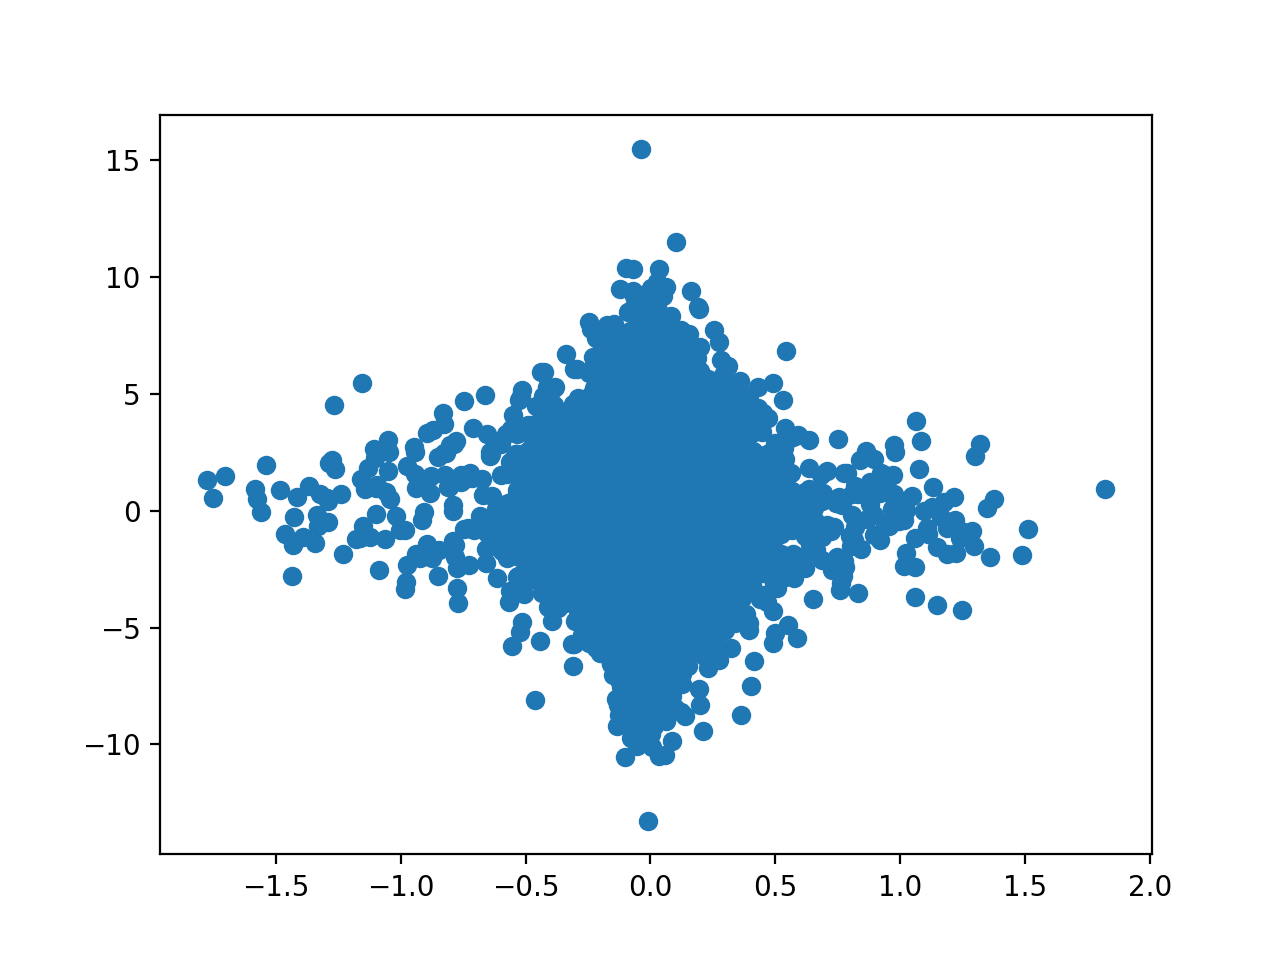

In [118]:
wx = X.T[goodinf,3]/obsunc[keep][goodinf]
wy = diff1[goodinf]/obsunc[keep][goodinf]
plt.scatter(wx, wy)
plt.show()

<IPython.core.display.Javascript object>


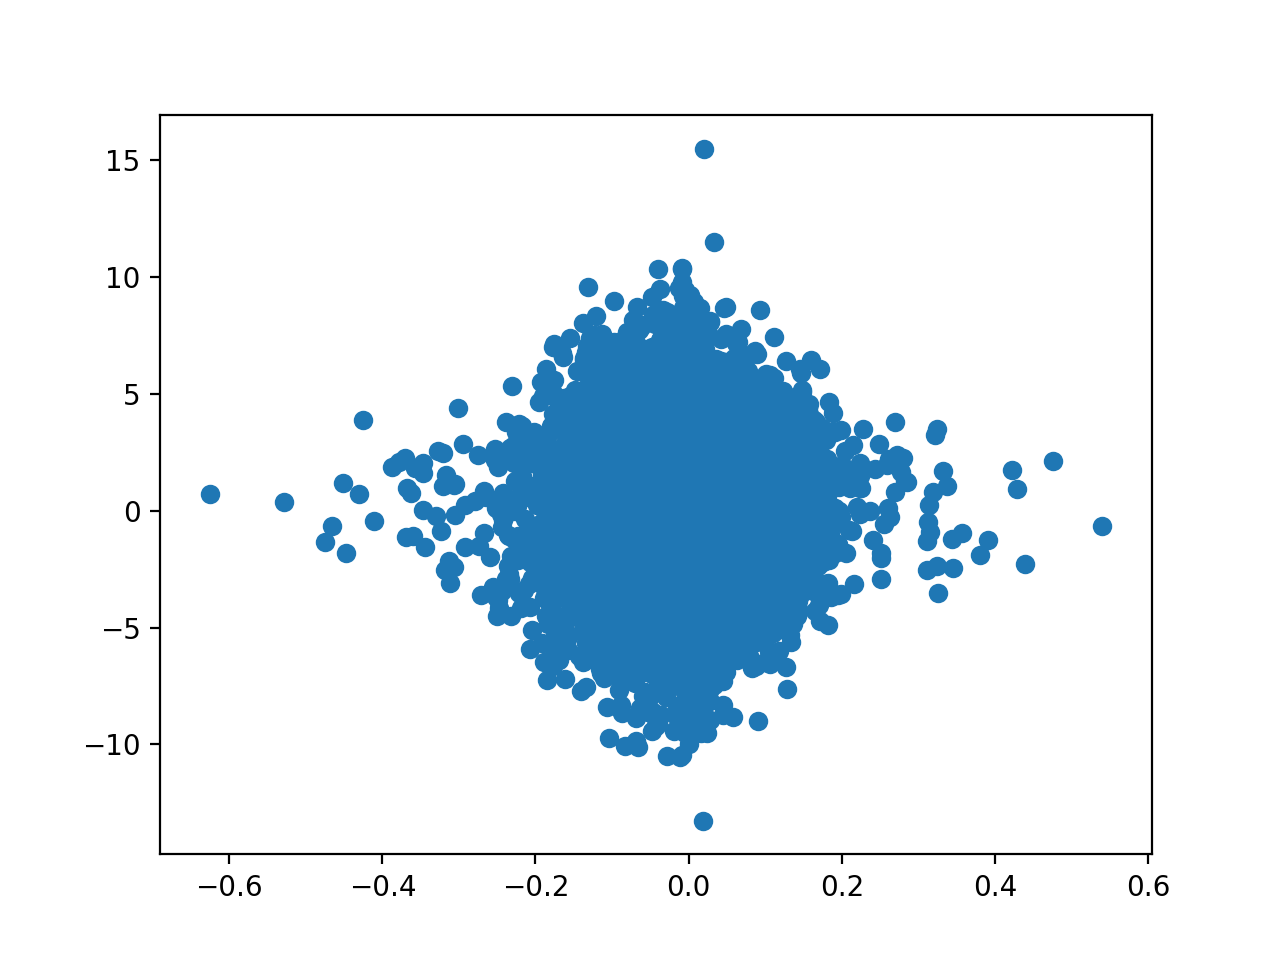

In [119]:
wx = X.T[goodinf,4]/obsunc[keep][goodinf]
wy = diff1[goodinf]/obsunc[keep][goodinf]
plt.scatter(wx, wy)
plt.show()

<IPython.core.display.Javascript object>


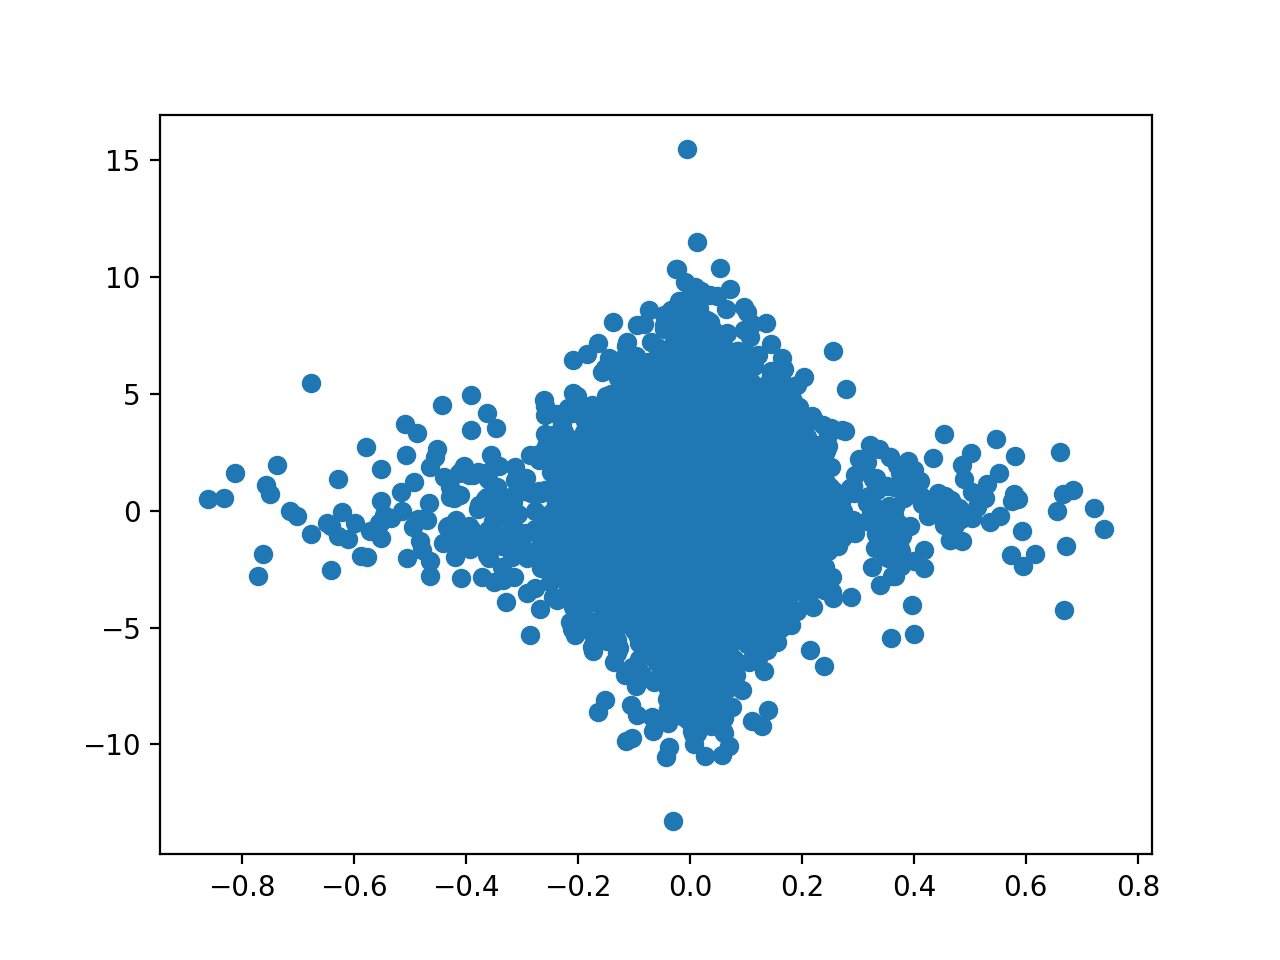

In [120]:
wx = X.T[goodinf,5]/obsunc[keep][goodinf]
wy = diff1[goodinf]/obsunc[keep][goodinf]
plt.scatter(wx, wy)
plt.show()

In [121]:
mdl = WLS(diff1[goodinf], X.T[goodinf,:], weights = 1/obsunc[keep][goodinf]**2).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            WLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              9.106
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    5.62e-10
Time:                        15:24:24   Log-Likelihood:                      1.1066e+05
No. Observations:               27262   AIC:                                 -2.213e+05
Df Residuals:                   27256   BIC:                                 -2.213e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9272      0.470      1.974      0.048       0.006       1.848
x2             0.0797      0.053      1.505      0.132      -0.024       0.183
x3             0.3033      0.059      5.133      0.000       0.187       0.419
x4            -0.4759      0.122     -3.899      0.000      -0.715      -0.237
x5            -0.2431      0.305     -0.797      0.425      -0.841       0.354
x6             0.4572      0.260      1.759      0.079      -0.052       0.967
==============================================================================
Omnibus:                       26.849   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.969
Skew:                          -0.011   Prob(JB):                     1.88e-07
Kurtosis:                       3.164   Cond. No.                         9.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Subtracted Median fit

In [122]:
avgcoefs = np.array([0.10861129, -0.07789303, -0.25117262, -0.04344422, -0.79384984, -0.2752789])

tempflx[keep] = tempflx[keep] - np.dot(X.T, avgcoefs.T)
diff1 = tempflx[keep] - obsflx[keep]

In [123]:
mdl1 = WLS(diff1, X.T, weights = 1/obsunc[keep]**2)
influence = OLS(mdl1.endog, mdl1.exog).fit().get_influence().influence
goodinf = np.where(np.abs(influence) <= np.median(influence) + np.percentile(influence, 75) + 50*(np.percentile(influence, 75) - np.percentile(influence, 25)))[0]

<IPython.core.display.Javascript object>


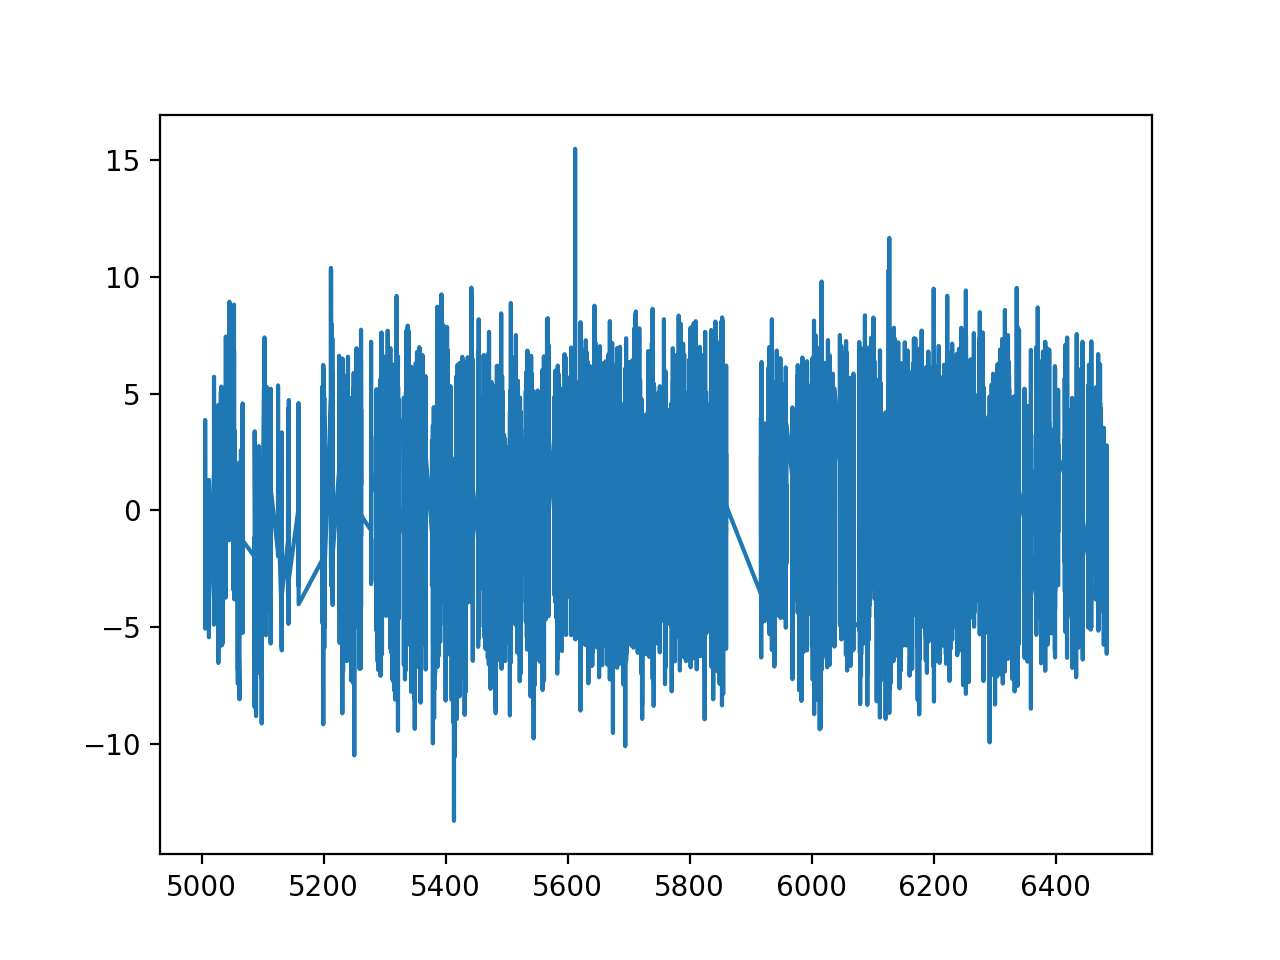

In [124]:
plt.plot(wvl[keep][goodinf], diff1[goodinf]/obsunc[keep][goodinf])
plt.show()

<IPython.core.display.Javascript object>


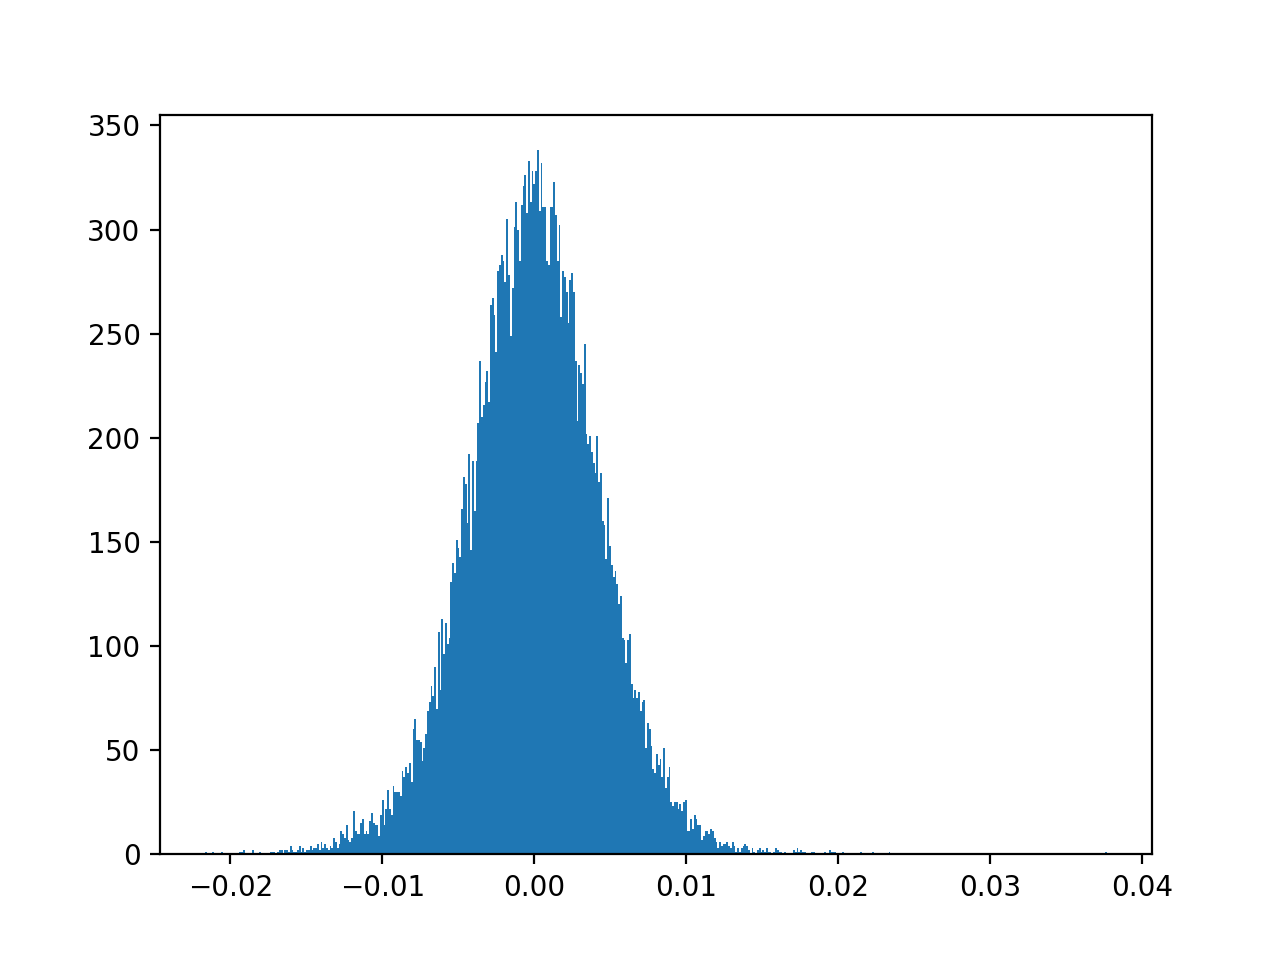

In [125]:
plt.hist(diff1[goodinf], bins=500)
plt.show()

<IPython.core.display.Javascript object>


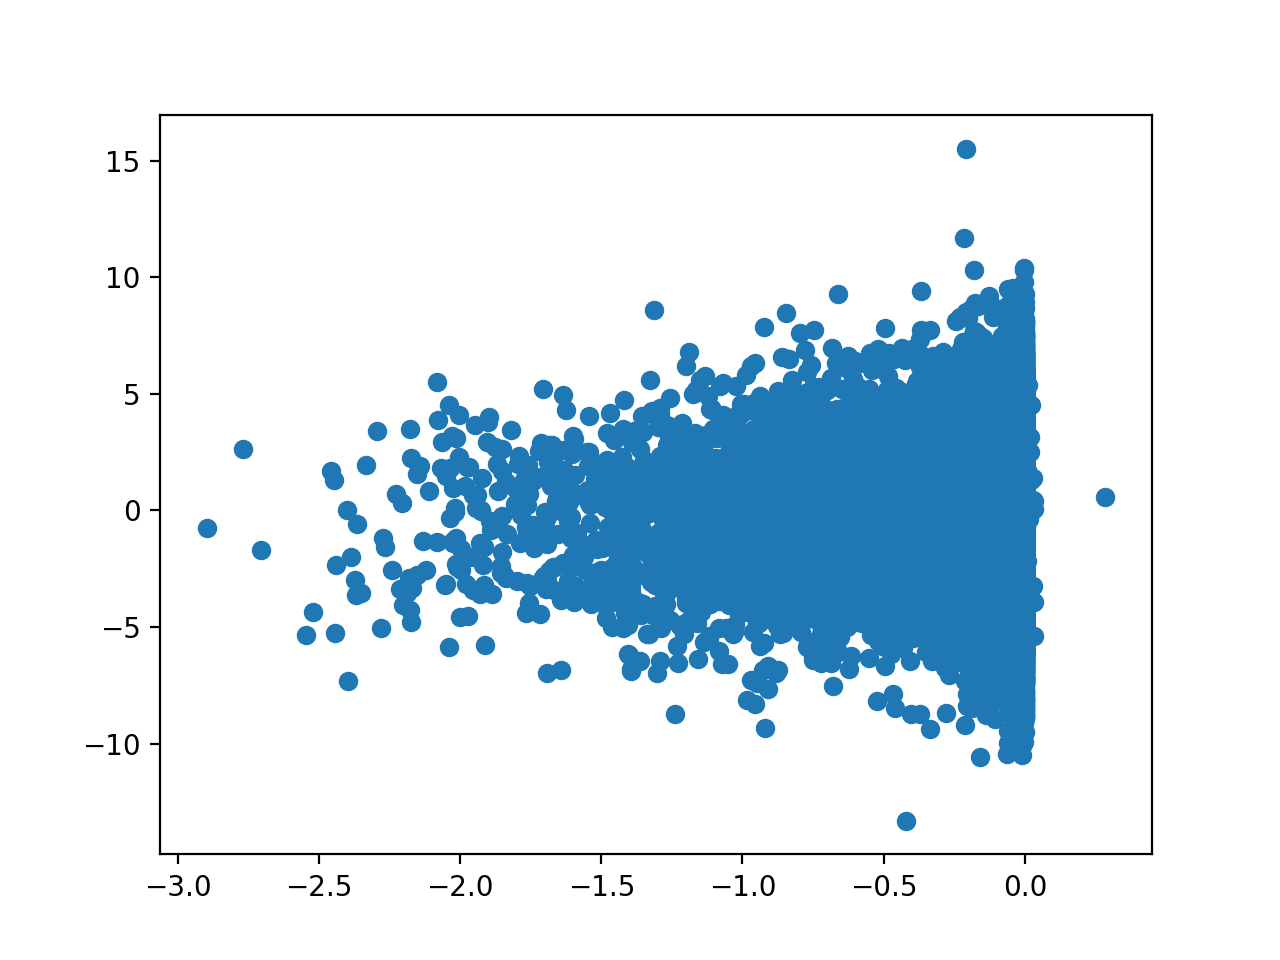

In [126]:
wx = X.T[goodinf,1]/obsunc[keep][goodinf]
wy = diff1[goodinf]/obsunc[keep][goodinf]
plt.scatter(wx, wy)
plt.show()

<IPython.core.display.Javascript object>


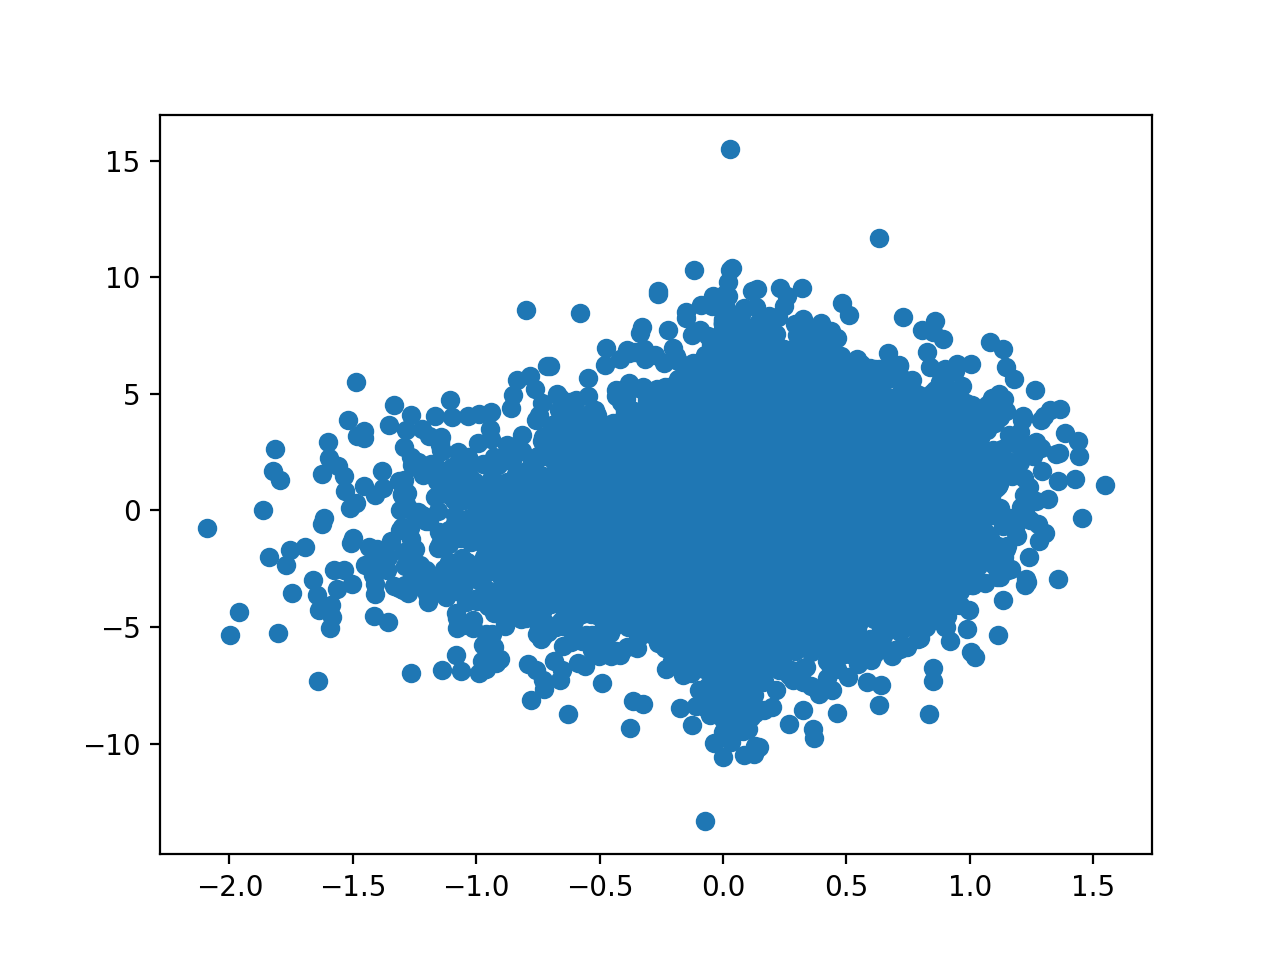

In [127]:
wx = X.T[goodinf,2]/obsunc[keep][goodinf]
wy = diff1[goodinf]/obsunc[keep][goodinf]
plt.scatter(wx, wy)
plt.show()

<IPython.core.display.Javascript object>


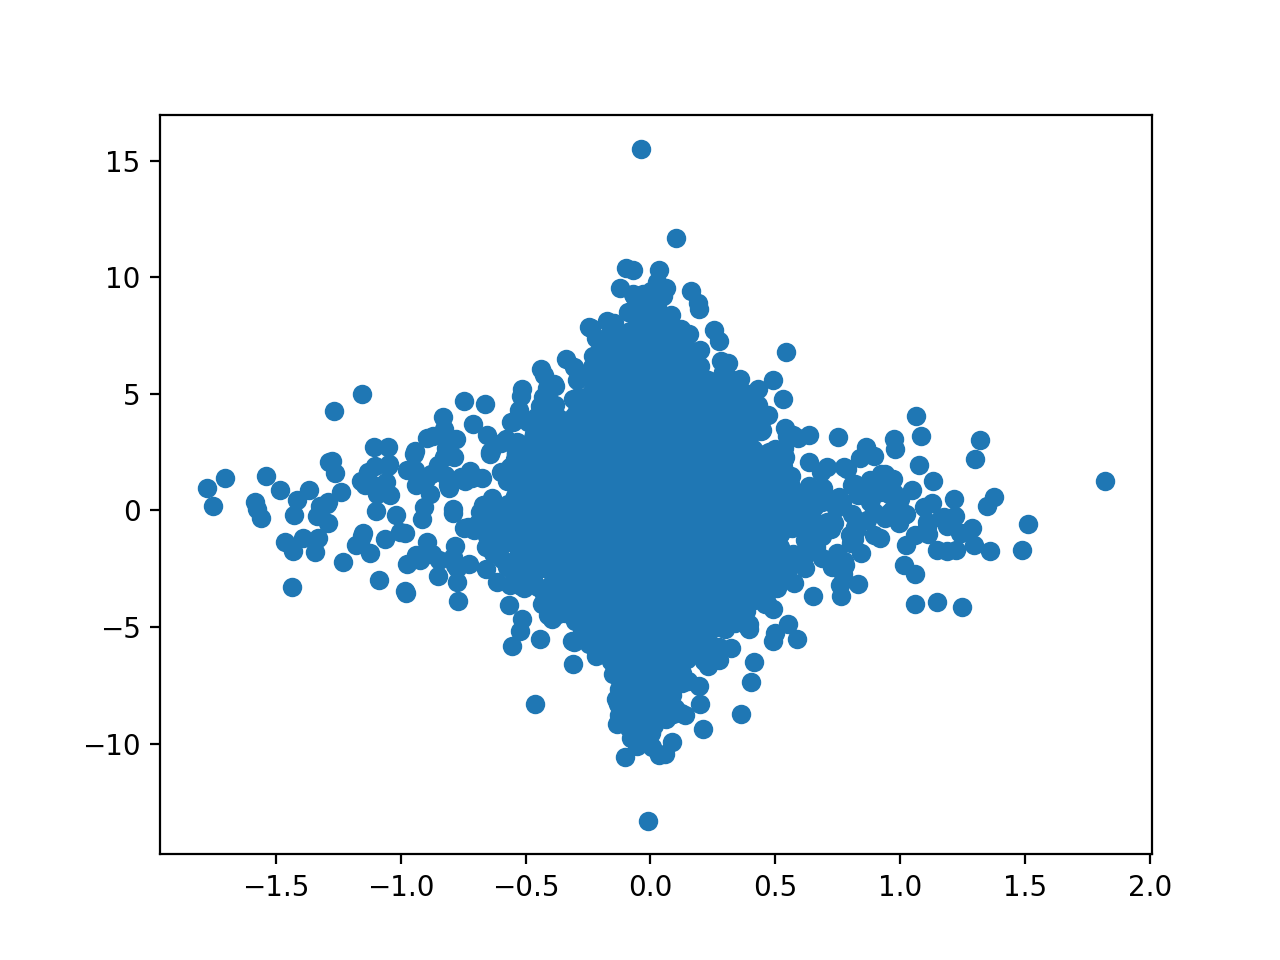

In [128]:
wx = X.T[goodinf,3]/obsunc[keep][goodinf]
wy = diff1[goodinf]/obsunc[keep][goodinf]
plt.scatter(wx, wy)
plt.show()

<IPython.core.display.Javascript object>


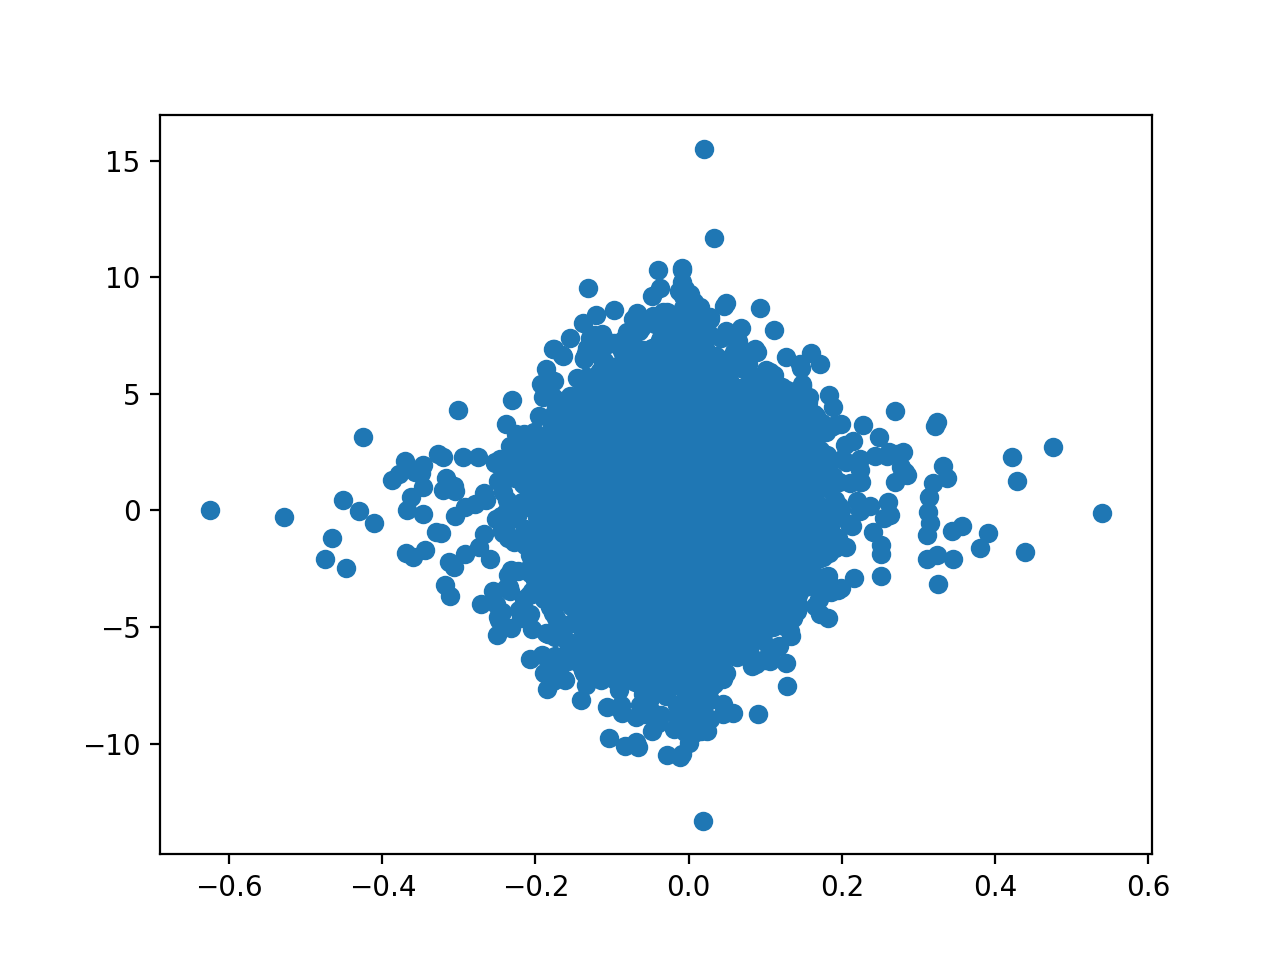

In [129]:
wx = X.T[goodinf,4]/obsunc[keep][goodinf]
wy = diff1[goodinf]/obsunc[keep][goodinf]
plt.scatter(wx, wy)
plt.show()

<IPython.core.display.Javascript object>


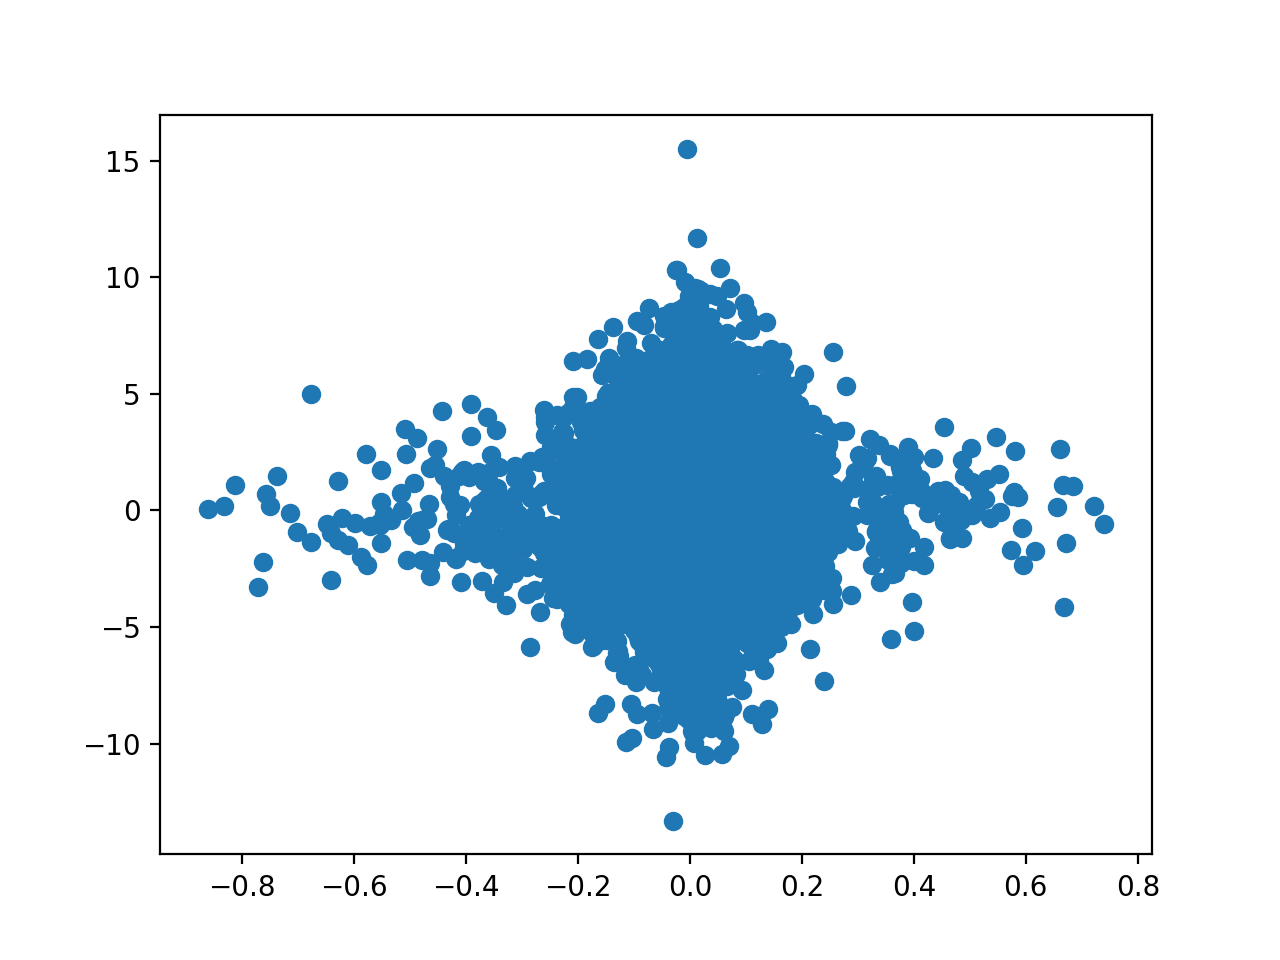

In [130]:
wx = X.T[goodinf,5]/obsunc[keep][goodinf]
wy = diff1[goodinf]/obsunc[keep][goodinf]
plt.scatter(wx, wy)
plt.show()

In [131]:
mdl = WLS(diff1[goodinf], X.T[goodinf,:], weights = 1/obsunc[keep][goodinf]**2).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.005
Model:                            WLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              24.50
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    4.01e-29
Time:                        15:25:16   Log-Likelihood:                      1.1066e+05
No. Observations:               27262   AIC:                                 -2.213e+05
Df Residuals:                   27256   BIC:                                 -2.213e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8186      0.470      1.743      0.081      -0.102       1.739
x2             0.1576      0.053      2.976      0.003       0.054       0.261
x3             0.5545      0.059      9.384      0.000       0.439       0.670
x4            -0.4325      0.122     -3.543      0.000      -0.672      -0.193
x5             0.5507      0.305      1.806      0.071      -0.047       1.148
x6             0.7324      0.260      2.819      0.005       0.223       1.242
==============================================================================
Omnibus:                       26.849   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.969
Skew:                          -0.011   Prob(JB):                     1.88e-07
Kurtosis:                       3.164   Cond. No.                         9.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""